# Introduction,Background and Research question

## Introduction

The inspiration for this mini project comes from daily life observation. For family reasons, I often go to St James Hospital in Leeds. Near that hospital, I found that the quality of the houses does not look very good. After checking the housing agency website, it appears that the average house price in that area is quite reasonable. A friend of mine who works at the hospital advised me to avoid being alone in the residential area near the hospital's back entrance because it's not very safe.
St James and LGI are the two largest hospitals in Leeds. LGI is surrounded by the university and municipal institutions, and there aren't many residential neighborhoods nearby. 
Therefore, ST. James Hospital was chosen as the main observation location. After staying and observing the residential area at the back entrance of the hospital for a while, I found that most of the residents were middle-aged and healthy people. 
The houses near St. James don't offer very high quality and their prices aren't very high either.

This experience is very different from my previous life experience and cognition. The city where I come from, Nanjing, is the capital of Jiangsu Province and one of the top 10 largest cities in China, with a population of nearly 10 million. Houses near hospitals, regardless of their condition and type, are generally more expensive. People who are often sick prefer to live nearby, so that it is more convenient to get to the hospital.One can easily speculate that the people living near the hospital may not enjoy the best health, yet the prices of the houses they reside in are relatively high.


This obvious difference makes me very curious. If there is a negative correlation between house prices and health in my hometown, and whether there is any correlation between house prices and health factors in the UK.

## Background
Before conducting the mini-project research, I  reviewed relevant literature.

Based on surveys,, whenever housing prices have increased by a certain percentage in the past three months, there has been an increase in the number of people seeking consultations with psychologists in the city.（Wei, G. and Zhu, H. 2021）
When the housing price index increases, the probability of being in good health increases by 2.81 percentage points, while the probability of being obese decreases by 1.82 percentage points.（Yue, D. , and Ponce, N. 2021）
Both real estate prices and inflation have an impact onpublicn health, such as housing rents having a positive and significant impact on infant mortality.（Bao, W. and Tao, R. 2022）
These articles all show that there is a certain correlation between health conditions and housing prices.

## Research question
Therefore, this mini-project will study the correlation between housing prices and health factors. For health factors, one of the most intuitive evaluation criteria are the disease incidence rates, so the disease incidence rates are selected as the main analysis indicators, and the housing prices will be more valuable after they are associated with geographical location information.
The research questions mainly focus on three aspects. 
1. Based on the research results of the literature, verify whether the housing prices have an impact on health (mainly focusing on the disease incidence rates);
2. Obtain the disease incidence rates of different types and study which diseases have a greater impact on the housing prices.
3. Try to explore the housing prices and the disease incidence rates in different geographical locations.

# Data

This mini project is doing correlation research between different factors, so the data comes from different fields. 

## Part one data source
The first dataset 'Mean price paid by ward'comes from the Office for National Statistics, HM Land Registry. These data are part of the House Price Statistics for Small Areas (HPSSAs) release, produced by ONS. The data excel contains several sheets, each sheet represents a different housing type,including detached, semi-detached, terraced houses and flats/maisonettes as well as a newbuild / existing dwelling breakdown.Each sheet records the average price of houses in different years according to different wards.

Key elements of the dataset include:

Location factors：The dataset includes variables like‘Local authority code’，‘Local authority name’，‘Ward code’，‘Ward name’. These are important data indicating the location, especially the ward code, which can be used  as important data to be associated with the second part of the medical data.

Price factors：with columns like ‘Year ending Dec 19952’，‘Year ending Mar 1996 and so on. These data record the average price of a certain type of house in the ward  as of a particular point in time. In subsequent analysis, we will select the data as of 2022 for analysis, because the data for this year is the most closely aligned with the statistical year of the healthcare data. 

## Part two data source
The second dataset comes from Local Health - Office for Health Improvement and Disparities. As an integration platform，Office for Health Improvement and Disparities integrates these health-related data. The original sources of these data are relevant research surveys led by the NHS or ONS.Such as National Child Measurement Programme (NCMP)； NHS Digital，English cancer registration data from the NHS Digital Cancer Analysis System (AV2019 CASREF01), National Statistical Postcode Lookup (May 2021) and so on.

Location factors：The dataset includes variables like'Code','Label','Code' represents ward code.

Incidence of several disease： Variables like'Incidence of breast cance','Incidence of colorectal cancer',' Incidence of lung cancer','Incidence of prostate cancer','Limiting long-term illness or disability','Reception: Prevalence of overweight (including obesity)'.
Take'Incidence of breast cancer'as an example，this indicator measures the number of new cases of breast cancer and present the data as a standardised incidence ratio (SIR) for breast cancers.

Probability of death from different diseases: Variables like'Deaths from coronary heart disease, all ages',' Deaths from stroke, all ages','Deaths from respiratory diseases, all ages','Deaths from circulatory disease, all ages'.
Take'Deaths from circulatory disease' as an example,this indicator measures Standardised mortality ratio for deaths from all circulatory diseases, persons of all ages.Other columns of data have similar meanings.


## Part three data source
The third part of data comes from '2011 Census Geography boundaries (Wards and Electoral Divisions)'. This dataset includes ward name, ward code, longitude and latitude information and other geographically related information, which is used for spatial analysis.

# Data Wrangling,Statistics and Visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pip install openpyxl
import openpyxl

Import the house price data. 
This dataset contains several sheets. Extract several useful sheets 1a-1e, and then retain the columns with key information.

In [2]:
excel_house = 'Mean_price_by_ward.xlsx'
house_price = pd.read_excel(excel_house,skiprows=5, 
                            usecols=['Ward code','Ward name','Year ending Dec 2022'],
                            sheet_name=['1a','1b','1c','1d','1e'])

In [3]:
#Integrate these sheets into a dataframe
merge_house_price= pd.concat(house_price.values(),axis=1,keys=house_price.keys())
merge_house_price

1a                                                    1b  \
      Ward code             Ward name Year ending Dec 2022  Ward code   
0     E05008945           Foggy Furze           109517.385  E05008945   
1     E05008946                  Hart           194522.585  E05008946   
2     E05008947  Headland and Harbour           126641.987  E05008947   
3     E05008943              De Bruce           127313.253  E05008943   
4     E05008944     Fens and Rossmere           158038.176  E05008944   
...         ...                   ...                  ...        ...   
8048  W05000895                Vaynor           210551.316  W05000895   
8049  W05000707              Bedlinog           156825.938  W05000707   
8050  W05000708             Cyfarthfa           219814.885  W05000708   
8051  W05000710                Gurnos           122074.074  W05000710   
8052  W05000711          Merthyr Vale           130298.735  W05000711   

                                                        1c  \
                 Ward name Year ending Dec 2022  Ward code   
0              Foggy Furze           219208.333  E05008945   
1                     Hart           257531.435  E05008946   
2     Headland and Harbour                    :  E05008947   
3                 De Bruce           215996.154  E05008943   
4        Fens and Rossmere           206852.941  E05008944   
...                    ...                  ...        ...   
8048                Vaynor           323083.333  W05000895   
8049              Bedlinog           308857.143  W05000707   
8050             Cyfarthfa               355150  W05000708   
8051                Gurnos                    :  W05000710   
8052          Merthyr Vale           255062.500  W05000711   

                                                        1d  \
                 Ward name Year ending Dec 2022  Ward code   
0              Foggy Furze           126690.078  E05008945   
1                     Hart           150633.962  E05008946   
2     Headland and Harbour               141500  E05008947   
3                 De Bruce           125058.278  E05008943   
4        Fens and Rossmere           161126.420  E05008944   
...                    ...                  ...        ...   
8048                Vaynor               182000  W05000895   
8049              Bedlinog           181519.231  W05000707   
8050             Cyfarthfa           193071.795  W05000708   
8051                Gurnos                    :  W05000710   
8052          Merthyr Vale           115502.300  W05000711   

                                                        1e  \
                 Ward name Year ending Dec 2022  Ward code   
0              Foggy Furze            78014.053  E05008945   
1                     Hart           132923.077  E05008946   
2     Headland and Harbour           135773.725  E05008947   
3                 De Bruce            95007.107  E05008943   
4        Fens and Rossmere           112804.762  E05008944   
...                    ...                  ...        ...   
8048                Vaynor           131329.167  W05000895   
8049              Bedlinog           107353.393  W05000707   
8050             Cyfarthfa           137025.800  W05000708   
8051                Gurnos           108318.182  W05000710   
8052          Merthyr Vale           102874.677  W05000711   

                                                 
                 Ward name Year ending Dec 2022  
0              Foggy Furze            69876.500  
1                     Hart            83142.857  
2     Headland and Harbour            95418.182  
3                 De Bruce                    :  
4        Fens and Rossmere                    :  
...                    ...                  ...  
8048                Vaynor                    :  
8049              Bedlinog                    :  
8050             Cyfarthfa                    :  
8051                Gurnos                    :  
8052          Merthyr Vale                

In [4]:
#Remove redundant duplicate information from the dataset and retain only key information.
columns_drop = [('1b','Ward name'),('1c','Ward name'),
                ('1d','Ward name'),('1e','Ward name'),
                ('1b','Ward code'),('1c','Ward code'),
               ('1d','Ward code'),('1e','Ward code')]
merge_house_price = merge_house_price.drop(columns=columns_drop)
merge_house_price

1a                                             \
      Ward code             Ward name Year ending Dec 2022   
0     E05008945           Foggy Furze           109517.385   
1     E05008946                  Hart           194522.585   
2     E05008947  Headland and Harbour           126641.987   
3     E05008943              De Bruce           127313.253   
4     E05008944     Fens and Rossmere           158038.176   
...         ...                   ...                  ...   
8048  W05000895                Vaynor           210551.316   
8049  W05000707              Bedlinog           156825.938   
8050  W05000708             Cyfarthfa           219814.885   
8051  W05000710                Gurnos           122074.074   
8052  W05000711          Merthyr Vale           130298.735   

                       1b                   1c                   1d  \
     Year ending Dec 2022 Year ending Dec 2022 Year ending Dec 2022   
0              219208.333           126690.078            78014.053   
1              257531.435           150633.962           132923.077   
2                       :               141500           135773.725   
3              215996.154           125058.278            95007.107   
4              206852.941           161126.420           112804.762   
...                   ...                  ...                  ...   
8048           323083.333               182000           131329.167   
8049           308857.143           181519.231           107353.393   
8050               355150           193071.795           137025.800   
8051                    :                    :           108318.182   
8052           255062.500           115502.300           102874.677   

                       1e  
     Year ending Dec 2022  
0               69876.500  
1               83142.857  
2               95418.182  
3                       :  
4                       :  
...                   ...  
8048                    :  
8049                    :  
8050                    :  
8051                    :  
8052                    :  

[8053 rows x 7 columns]

In [5]:
#Remove the primary index to facilitate subsequent data management
house_price_fin = merge_house_price.droplevel(0,axis=1)
house_price_fin

Ward code             Ward name Year ending Dec 2022  \
0     E05008945           Foggy Furze           109517.385   
1     E05008946                  Hart           194522.585   
2     E05008947  Headland and Harbour           126641.987   
3     E05008943              De Bruce           127313.253   
4     E05008944     Fens and Rossmere           158038.176   
...         ...                   ...                  ...   
8048  W05000895                Vaynor           210551.316   
8049  W05000707              Bedlinog           156825.938   
8050  W05000708             Cyfarthfa           219814.885   
8051  W05000710                Gurnos           122074.074   
8052  W05000711          Merthyr Vale           130298.735   

     Year ending Dec 2022 Year ending Dec 2022 Year ending Dec 2022  \
0              219208.333           126690.078            78014.053   
1              257531.435           150633.962           132923.077   
2                       :               141500           135773.725   
3              215996.154           125058.278            95007.107   
4              206852.941           161126.420           112804.762   
...                   ...                  ...                  ...   
8048           323083.333               182000           131329.167   
8049           308857.143           181519.231           107353.393   
8050               355150           193071.795           137025.800   
8051                    :                    :           108318.182   
8052           255062.500           115502.300           102874.677   

     Year ending Dec 2022  
0               69876.500  
1               83142.857  
2               95418.182  
3                       :  
4                       :  
...                   ...  
8048                    :  
8049                    :  
8050                    :  
8051                    :  
8052                    :  

[8053 rows x 7 columns]

In [6]:
#Give appropriate names to the data in each column
new_columns_name= ['all type_mean price','detached houses','semi-detached houses',
                            'terraced houses','flats/maisonettes']
house_price_fin.columns = list(house_price_fin.columns[:-5])+new_columns_name
house_price_fin

Ward code             Ward name all type_mean price detached houses  \
0     E05008945           Foggy Furze          109517.385      219208.333   
1     E05008946                  Hart          194522.585      257531.435   
2     E05008947  Headland and Harbour          126641.987               :   
3     E05008943              De Bruce          127313.253      215996.154   
4     E05008944     Fens and Rossmere          158038.176      206852.941   
...         ...                   ...                 ...             ...   
8048  W05000895                Vaynor          210551.316      323083.333   
8049  W05000707              Bedlinog          156825.938      308857.143   
8050  W05000708             Cyfarthfa          219814.885          355150   
8051  W05000710                Gurnos          122074.074               :   
8052  W05000711          Merthyr Vale          130298.735      255062.500   

     semi-detached houses terraced houses flats/maisonettes  
0              126690.078       78014.053         69876.500  
1              150633.962      132923.077         83142.857  
2                  141500      135773.725         95418.182  
3              125058.278       95007.107                 :  
4              161126.420      112804.762                 :  
...                   ...             ...               ...  
8048               182000      131329.167                 :  
8049           181519.231      107353.393                 :  
8050           193071.795      137025.800                 :  
8051                    :      108318.182                 :  
8052           115502.300      102874.677                 :  

[8053 rows x 7 columns]

Next, process the second dataset, import the medical data, and give the correct name to the 'wardcode' that needs to be associated.

In [7]:
health_data = pd.read_excel('health_data.xlsx')
health_data = health_data.rename(columns={'Code':'Ward code'})
health_data

Ward code                                Label  \
0     E05000026                                Abbey   
1     E05000027                               Alibon   
2     E05000028                            Becontree   
3     E05000029                       Chadwell Heath   
4     E05000030                            Eastbrook   
...         ...                                  ...   
7003  E05013859                 St Mewan & Grampound   
7004  E05013860  St Newlyn East, Cubert & Goonhavern   
7005  E05013861          Threemilestone & Chacewater   
7006  E05013862                               Bothal   
7007  E05013863                             Pegswood   

     Incidence of breast cancer Incidence of colorectal cancer  \
0                        91.300                        131.300   
1                        82.200                         78.800   
2                        62.100                         87.700   
3                        89.800                        108.400   
4                        93.700                         88.300   
...                         ...                            ...   
7003                     97.300                         82.600   
7004                        130                            110   
7005                     88.300                         76.600   
7006                     98.700                         98.300   
7007                    116.700                        150.600   

     Incidence of lung cancer Incidence of prostate cancer  \
0                      76.100                          163   
1                     184.800                      144.800   
2                     124.500                      100.200   
3                     104.900                      117.300   
4                     139.100                      136.500   
...                       ...                          ...   
7003                   62.500                       96.200   
7004                   75.600                           83   
7005                   87.200                       84.900   
7006                  113.300                       87.800   
7007                  141.200                       78.800   

      Limiting long-term illness or disability  \
0                                       10.800   
1                                       16.900   
2                                       17.000   
3                                       19.300   
4                                       17.400   
...                                        ...   
7003                                    21.500   
7004                                    18.600   
7005                                    18.300   
7006                                    25.100   
7007                                    19.900   

     Reception: Prevalence of overweight (including obesity)  \
0                                                22.500        
1                                                26.500        
2                                                23.700        
3                                                28.400        
4                                                    28        
...                                                 ...        
7003                                             22.700        
7004                                             21.600        
7005                                             21.700        
7006                                                 20        
7007                                             11.800        

     Deaths from coronary heart disease, all ages  \
0                                         152.300   
1                                          86.600   
2                                         142.600   
3                                          96.500   
4                                         106.300   
...                                           ...   
7003                                      122.600   
7

In [8]:
#Correlate the processed house prices and health data, retaining only the common part
analysis_data = pd.merge(house_price_fin,health_data,on='Ward code',how='inner' )
analysis_data = analysis_data.drop('Label',axis=1)
analysis_data

Ward code                  Ward name all type_mean price  \
0     E05009855  Berwick Hills & Pallister           90872.807   
1     E05009853                     Acklam          175045.117   
2     E05009856       Brambles & Thorntree           97968.880   
3     E05009854                   Ayresome          125880.671   
4     E05009869                       Park          126473.431   
...         ...                        ...                 ...   
6498  E05000645                  Tachbrook         1018946.959   
6499  E05000648                 Westbourne          747059.942   
6500  E05000649                   West End         4001252.954   
6501  E05000647                    Warwick         1266360.602   
6502  E05000646             Vincent Square         1026763.851   

     detached houses semi-detached houses terraced houses flats/maisonettes  \
0                  :                98750       80041.667                 :   
1         336687.500           174972.137      120618.125             89645   
2                  :           104812.714       79269.154                 :   
3                  :           146667.649       97712.464                 :   
4                  :           163459.231      109986.737         68495.455   
...              ...                  ...             ...               ...   
6498               :                    :         2059500        856360.547   
6499               :                    :               :        692736.807   
6500               :                    :               :       3706017.217   
6501               :                    :     2346731.889       1050286.344   
6502               :                    :               :        990036.656   

     Incidence of breast cancer Incidence of colorectal cancer  \
0                       118.800                        131.700   
1                        92.800                        121.500   
2                       109.500            N/A - not available   
3                        81.500                        142.400   
4                        99.300                            110   
...                         ...                            ...   
6498                    101.100                         98.800   
6499                     78.600                         85.400   
6500                     71.400                         49.600   
6501                     78.400                         58.800   
6502                     60.800                         75.100   

     Incidence of lung cancer Incidence of prostate cancer  \
0                     298.800                      107.800   
1                          96                       94.300   
2                     360.300                       84.900   
3                     230.200                      111.700   
4                     159.600                      121.800   
...                       ...                          ...   
6498                   94.900                           99   
6499                      165                      104.800   
6500                       86                       79.900   
6501                       77                       84.400   
6502                  106.400                       80.300   

      Limiting long-term illness or disability  \
0                                       23.600   
1                                       17.800   
2                                       24.500   
3                                       19.600   
4                                       18.600   
...                                        ...   
6498                                    15.400   
6499                                    19.500   
6500                                    11.500   
6501                                    13.400   
6502                                    14.400   

     Reception: Prevalence of overweight (including obesity)  \
0                                                28.100      

In [9]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6503 entries, 0 to 6502
Data columns (total 19 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Ward code                                                6503 non-null   object 
 1   Ward name                                                6503 non-null   object 
 2   all type_mean price                                      6503 non-null   object 
 3   detached houses                                          6503 non-null   object 
 4   semi-detached houses                                     6503 non-null   object 
 5   terraced houses                                          6503 non-null   object 
 6   flats/maisonettes                                        6503 non-null   object 
 7   Incidence of breast cancer                               6503 non-null   object 
 8   Incidence of colorectal canc

In [10]:
analysis_data.columns

Index(['Ward code', 'Ward name', 'all type_mean price', 'detached houses',
       'semi-detached houses', 'terraced houses', 'flats/maisonettes',
       'Incidence of breast cancer', 'Incidence of colorectal cancer',
       'Incidence of lung cancer', 'Incidence of prostate cancer',
       'Limiting long-term illness or disability',
       'Reception: Prevalence of overweight (including obesity)',
       'Deaths from coronary heart disease, all ages',
       'Deaths from stroke, all ages',
       'Deaths from respiratory diseases, all ages',
       'Deaths from circulatory disease, all ages',
       'Population whose ethnic group is not 'white'', 'Population density'],
      dtype='object')

Many of the data types of merged tables are objects. This type of data is difficult to analyze, so all object data are first converted into floats, and meaningless special symbols and statements are converted into nan values before conversion.

In [11]:
analysis_data = analysis_data.replace(':',np.nan)
analysis_data = analysis_data.replace('N/A - not available',np.nan)
analysis_data[['detached houses', 'semi-detached houses',
       'terraced houses', 'flats/maisonettes', 'Incidence of breast cancer',
       'Incidence of colorectal cancer', 'Incidence of lung cancer',
       'Incidence of prostate cancer',
       'Limiting long-term illness or disability',
       'Reception: Prevalence of overweight (including obesity)',
       'Deaths from coronary heart disease, all ages',
       'Deaths from stroke, all ages',
       'Deaths from respiratory diseases, all ages',
       'Deaths from circulatory disease, all ages',
       'Population density']] = analysis_data[['detached houses', 'semi-detached houses',
                                                'terraced houses', 'flats/maisonettes', 'Incidence of breast cancer',
                                               'Incidence of colorectal cancer', 'Incidence of lung cancer',
                                               'Incidence of prostate cancer',
                                               'Limiting long-term illness or disability',
                                               'Reception: Prevalence of overweight (including obesity)',
                                               'Deaths from coronary heart disease, all ages',
                                               'Deaths from stroke, all ages',
                                               'Deaths from respiratory diseases, all ages',
                                               'Deaths from circulatory disease, all ages',
                                               'Population density']].apply(pd.to_numeric)

In [12]:
analysis_data.shape

(6503, 19)

In [13]:
analysis_data.sample(10)

Ward code                             Ward name  all type_mean price  \
5257  E05000862                            Wigan West           146620.904   
436   E05008733                  Hanford and Trentham           259915.125   
88    E05010422                                Mowden           221578.431   
1400  E05011275  St Neots Priory Park & Little Paxton           387411.828   
5454  E05011447                              Gosforth           430128.230   
1474  E05012943                    Cathedral & Castle           133111.830   
5437  E05011436                         Arthur's Hill           169999.833   
4009  E05009364              Brize Norton and Shilton           601192.857   
1080  E05008141       Bayston Hill, Column and Sutton           299752.500   
6158  E05000315                               Hylands           481322.338   

      detached houses  semi-detached houses  terraced houses  \
5257       207474.000            173712.417       126165.857   
436        310550.667            221581.339       180718.750   
88         284883.333            222815.625              NaN   
1400       574708.229            351594.000       322918.571   
5454      1042950.100            596756.061       463119.087   
1474              NaN            146241.667       130721.967   
5437              NaN                   NaN       177884.615   
4009       920505.556            397500.000       311600.000   
1080       390757.500            264402.569       211523.571   
6158       688200.000            510982.154       494406.266   

      flats/maisonettes  Incidence of breast cancer  \
5257                NaN                      96.000   
436                 NaN                     105.800   
88           139135.714                     108.700   
1400         194576.923                     101.000   
5454         207339.814                      96.100   
1474         131892.857                      85.900   
5437         163970.294                     129.900   
4009                NaN                     117.900   
1080                NaN                      97.800   
6158         238595.238                     136.900   

      Incidence of colorectal cancer  Incidence of lung cancer  \
5257                         106.200                   120.500   
436                          100.900                    93.300   
88                           100.600                    63.600   
1400                          87.400                    89.600   
5454                         105.000                    68.700   
1474                          88.800                   118.100   
5437                          95.000                   252.900   
4009                          76.000                       NaN   
1080                         106.300                    50.000   
6158                          94.700                    92.500   

      Incidence of prostate cancer  Limiting long-term illness or disability  \
5257                        83.500                                    21.400   
436                         86.900                                    20.500   
88                          76.300                                    20.300   
1400                        96.900                                    15.200   
5454                        98.200                                    14.200   
1474                        99.300                                    18.500   
5437                        77.100                                    13.200   
4009                        77.000                                    15.200   
1080                       100.500                                    18.900   
6158                       130.600                                    15.700   

      Reception: Prevalence of overweight (including obesity)  \
5257                                             25.600         
436                                              22.000         
88                               

In [14]:
analysis_data.describe()

all type_mean price  detached houses  semi-detached houses  \
count             6497.000         5450.000              5960.000   
mean            385007.084       554402.017            363252.377   
std             253700.317       451106.164            285177.902   
min              63687.207       155200.000             85107.842   
25%             234703.548       346235.096            219617.764   
50%             334296.094       462774.753            306151.389   
75%             462567.077       635155.594            423351.509   
max            5734038.667     17970000.000           7835714.286   

       terraced houses  flats/maisonettes  Incidence of breast cancer  \
count         5815.000           3938.000                    6447.000   
mean        334566.556         230969.981                     100.526   
std         374192.282         193369.035                      21.916   
min          54357.214          33526.343                      32.600   
25%         180857.062         131951.875                      85.850   
50%         264037.500         188298.322                      99.600   
75%         370925.510         266091.204                     114.300   
max        7186928.286        4722631.604                     225.900   

       Incidence of colorectal cancer  Incidence of lung cancer  \
count                        6387.000                  6275.000   
mean                          100.832                    99.235   
std                            23.564                    41.582   
min                            32.500                    20.700   
25%                            85.000                    69.700   
50%                            99.700                    90.600   
75%                           114.900                   120.700   
max                           274.800                   384.200   

       Incidence of prostate cancer  Limiting long-term illness or disability  \
count                      6434.000                                  6503.000   
mean                        101.295                                    17.811   
std                          25.996                                     4.311   
min                          22.700                                     2.200   
25%                          83.325                                    14.800   
50%                          99.000                                    17.500   
75%                         117.200                                    20.500   
max                         232.900                                    40.800   

       Reception: Prevalence of overweight (including obesity)  \
count                                           5976.000         
mean                                              22.165         
std                                                4.992         
min                                                6.900         
25%                                               18.600         
50%                                               22.200         
75%                                               25.600         
max                                               42.900         

       Deaths from coronary heart disease, all ages  \
count                                      6491.000   
mean                                         99.013   
std                                          33.547   
min                                           0.000   
25%                                          76.200   
50%                                          94.300   
75%                                         116.900   
max                                         293.800   

       Deaths from stroke, all ages  \
count                      6491.000   
mean                         98.723   
std                          38.493   
min                           0.000   
25%                          73.200   
50%                          93.600   
75%                         1

In [15]:
analysis_data['all type_mean price'].value_counts()

90872.807      1
379335.765     1
958711.487     1
515010.185     1
879981.371     1
              ..
367456.522     1
356570.175     1
583072.917     1
801420.000     1
1026763.851    1
Name: all type_mean price, Length: 6497, dtype: int64

In [16]:
analysis_data['detached houses'].value_counts()

421000.000     3
335500.000     2
467857.143     2
473333.333     2
504500.000     2
              ..
351041.643     1
655720.455     1
357250.000     1
880946.429     1
7416482.600    1
Name: detached houses, Length: 5405, dtype: int64

In [17]:
analysis_data['semi-detached houses'].value_counts()

388500.000     4
295500.000     3
532500.000     3
535000.000     2
159500.000     2
              ..
382236.542     1
343787.879     1
363075.000     1
353112.592     1
4662219.917    1
Name: semi-detached houses, Length: 5922, dtype: int64

In [18]:
analysis_data['terraced houses'].value_counts()

419000.000     3
225166.667     3
134100.000     2
234166.667     2
291000.000     2
              ..
299180.400     1
299346.154     1
297214.286     1
339190.612     1
2346731.889    1
Name: terraced houses, Length: 5754, dtype: int64

In [19]:
analysis_data['flats/maisonettes'].value_counts()

145833.333    3
88500.000     3
157000.000    3
176833.333    3
200000.000    3
             ..
157355.338    1
258326.923    1
177947.368    1
164212.500    1
990036.656    1
Name: flats/maisonettes, Length: 3862, dtype: int64

In [20]:
analysis_data['Incidence of breast cancer'].value_counts()

88.700     24
106.000    23
102.100    22
92.500     20
96.700     20
           ..
43.800      1
144.800     1
160.400     1
55.300      1
148.800     1
Name: Incidence of breast cancer, Length: 1074, dtype: int64

In [21]:
analysis_data['Incidence of colorectal cancer'].value_counts()

82.800     21
105.300    20
94.700     19
102.300    19
83.700     18
           ..
158.800     1
200.500     1
166.400     1
175.500     1
45.900      1
Name: Incidence of colorectal cancer, Length: 1129, dtype: int64

In [22]:
analysis_data['Incidence of lung cancer'].value_counts()

72.200     17
78.000     16
78.700     15
86.800     14
73.500     14
           ..
53.500      1
35.900      1
26.800      1
167.600     1
165.000     1
Name: Incidence of lung cancer, Length: 1608, dtype: int64

In [23]:
analysis_data['Incidence of prostate cancer'].value_counts()

95.700     20
95.500     19
82.500     18
97.000     18
99.400     18
           ..
51.500      1
154.700     1
32.000      1
47.000      1
180.300     1
Name: Incidence of prostate cancer, Length: 1205, dtype: int64

In [24]:
analysis_data['Limiting long-term illness or disability'].value_counts()

16.600    78
16.300    74
16.900    70
17.600    69
15.500    68
          ..
31.800     1
32.100     1
38.300     1
38.000     1
6.000      1
Name: Limiting long-term illness or disability, Length: 268, dtype: int64

In [25]:
analysis_data['Reception: Prevalence of overweight (including obesity)'].value_counts()

25.000    289
20.000    262
16.700    176
18.200    139
21.400    136
         ... 
9.700       1
42.100      1
41.700      1
34.400      1
8.200       1
Name: Reception: Prevalence of overweight (including obesity), Length: 254, dtype: int64

In [26]:
analysis_data['Deaths from circulatory disease, all ages'].value_counts()

95.100     22
85.900     21
91.500     20
101.300    20
91.400     20
           ..
64.700      1
38.400      1
172.000     1
152.300     1
32.100      1
Name: Deaths from circulatory disease, all ages, Length: 1176, dtype: int64

In [27]:
analysis_data['Deaths from coronary heart disease, all ages'].value_counts()

82.000     18
89.200     18
79.200     16
87.800     15
80.300     15
           ..
49.000      1
117.500     1
40.800      1
26.400      1
16.600      1
Name: Deaths from coronary heart disease, all ages, Length: 1443, dtype: int64

In [28]:
analysis_data['Deaths from respiratory diseases, all ages'].value_counts()

91.800     20
71.200     19
72.100     16
96.600     16
86.700     15
           ..
32.300      1
34.600      1
36.800      1
125.700     1
28.400      1
Name: Deaths from respiratory diseases, all ages, Length: 1538, dtype: int64

In [29]:
analysis_data['Deaths from stroke, all ages'].value_counts()

82.700     18
84.100     18
97.300     16
86.100     15
0.000      15
           ..
135.700     1
176.300     1
155.700     1
148.100     1
44.500      1
Name: Deaths from stroke, all ages, Length: 1573, dtype: int64

In [30]:
analysis_data['Population density'].value_counts()

95.700       6
91.100       4
83.100       4
96.000       4
120.100      4
            ..
6910.200     1
3914.200     1
245.000      1
381.000      1
21564.700    1
Name: Population density, Length: 5873, dtype: int64

In [31]:
analysis_data['Population whose ethnic group is not \'white\''].value_counts()

1.300     154
2.100     150
1.500     147
1.400     146
1.900     145
         ... 
48.800      1
82.700      1
65.000      1
74.600      1
37.200      1
Name: Population whose ethnic group is not 'white', Length: 655, dtype: int64

The merged dataframe has a total of 6503 rows and 18 columns. The first two columns are ward code and ward name, which are mainly used to locate data and indicate the location of the data.

'Detached houses', 'semi-detached houses', 'terraced houses', 'flats/maisonettes' (Unit: pound) are the average house price data of each ward as of the end of 2022.

'Incidence of breast cancer5'(Unit:%)：This indicator measures the number of new cases of breast cancer and present the data as a standardised incidence ratio (SIR) for breast cancers.

'Incidence of colorectal cancer'(Unit:%):This indicator measures the number of new cases of colorectal cancer and present the data as a standardised incidence ratio (SIR) for colorectal cancers.

'Incidence of lung cancer'(Unit:%):This indicator measures the number of new cases of lung cancer and present the data as a standardised incidence ratio (SIR) for lung cancers.

'Incidence of prostate cancer'(Unit:%):This indicator measures the number of new cases of prostate cancer and presents the data as a standardised incidence ratio (SIR) for prostate cancers.

'Limiting long-term illness or disability'(Unit:%):The number of people who reported in the 2011 Census that their day to day activities were limited because of a health problem or disability which has lasted, or is expected to last at least 12 months. Reported as a percentage of the total number of respondents to the census question.

'Reception: Prevalence of overweight_including obesity'(Unit:%):Proportion of children aged 4 to 5 years with a valid height and weight measured by the NCMP classified as overweight or living with obesity.

'Deaths from coronary heart disease,all ages'(Unit:SMR) :Standardised mortality ratio for deaths from all coronary heart disease at all ages.

'Deaths from stroke, all ages'(Unit:SMR) :Standardised mortality ratio for deaths from stroke at all ages.

'Deaths from respiratory diseases, all ages'(Unit:SMR):Standardised mortality ratio for deaths from all respiratory disease at all ages.

'Deaths from circulatory disease, all ages'(Unit:SMR):Standardised mortality ratio for deaths from all circulatory diseases, persons of all ages.

In [31]:
analysis_data.head()

Ward code                  Ward name  all type_mean price  detached houses  \
0  E05009855  Berwick Hills & Pallister            90872.807              NaN   
1  E05009853                     Acklam           175045.117       336687.500   
2  E05009856       Brambles & Thorntree            97968.880              NaN   
3  E05009854                   Ayresome           125880.671              NaN   
4  E05009869                       Park           126473.431              NaN   

   semi-detached houses  terraced houses  flats/maisonettes  \
0             98750.000        80041.667                NaN   
1            174972.137       120618.125          89645.000   
2            104812.714        79269.154                NaN   
3            146667.649        97712.464                NaN   
4            163459.231       109986.737          68495.455   

   Incidence of breast cancer  Incidence of colorectal cancer  \
0                     118.800                         131.700   
1                      92.800                         121.500   
2                     109.500                             NaN   
3                      81.500                         142.400   
4                      99.300                         110.000   

   Incidence of lung cancer  Incidence of prostate cancer  \
0                   298.800                       107.800   
1                    96.000                        94.300   
2                   360.300                        84.900   
3                   230.200                       111.700   
4                   159.600                       121.800   

   Limiting long-term illness or disability  \
0                                    23.600   
1                                    17.800   
2                                    24.500   
3                                    19.600   
4                                    18.600   

   Reception: Prevalence of overweight (including obesity)  \
0                                             28.100         
1                                             25.000         
2                                             30.900         
3                                             33.300         
4                                             25.800         

   Deaths from coronary heart disease, all ages  Deaths from stroke, all ages  \
0                                       231.200                       116.500   
1                                        97.400                       123.200   
2                                       195.300                       154.800   
3                                       135.400                        93.500   
4                                       111.000                       241.600   

   Deaths from respiratory diseases, all ages  \
0                                     243.500   
1                                      58.900   
2                                     312.300   
3                                     108.900   
4                                     175.700   

   Deaths from circulatory disease, all ages  \
0                                    178.800   
1                                     96.500   
2                                    181.600   
3                                    114.800   
4                                    145.300   

   Population whose ethnic group is not 'white'  Population density  
0                                         2.800            4122.000  
1                                         8.800            2935.500  
2                                         3.500            3382.500  
3                                         9.800            2662.200  
4                                        18.000            6163.300

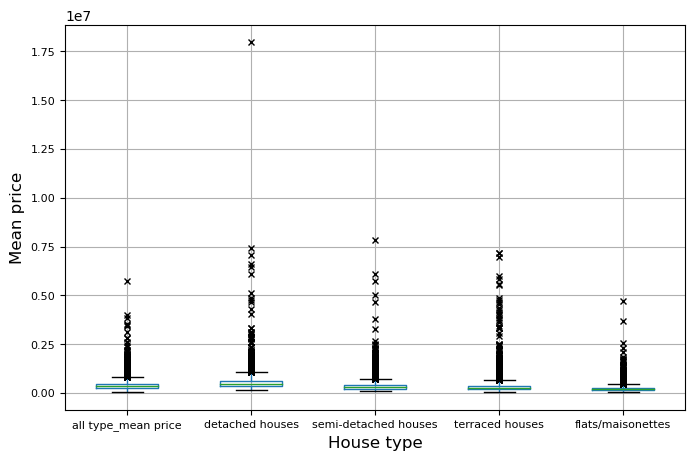

In [32]:
#Quantitative analysis of the data distribution of housing prices(units:pounds)
col_show = ['all type_mean price','detached houses','semi-detached houses',
            'terraced houses','flats/maisonettes']
style = dict(marker='x', markersize=4)
analysis_data.boxplot(column=col_show,flierprops=style,figsize=(8,5))
plt.xlabel('House type', fontsize=12)
plt.ylabel('Mean price', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

It can be seen from the distribution of average price data of various houses that detached houses have the largest price range and flats have the smallest price range. However, no matter what type of house they are, the price ranges are relatively close.
Furthermore, houses are not like other standardized goods, and each house has a unique price. Due to the presence of numerous outliers that surpass the upper limit, it indicates significant fluctuations in the maximum house values.

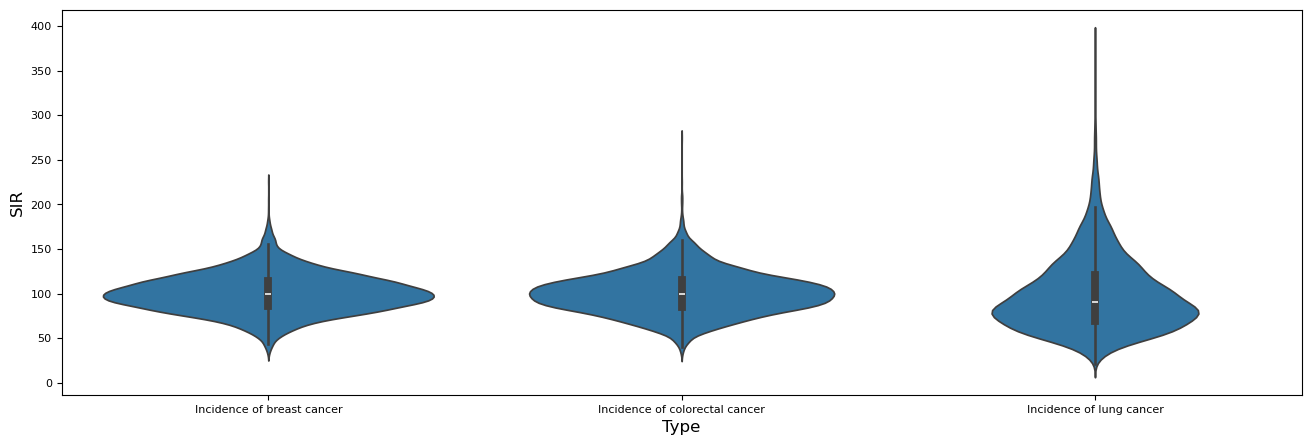

In [33]:
#Quantitative analysis of data distribution of cancer incidence rates(units:SIR)
plt.figure(figsize=(16, 5))
col_show1 = ['Incidence of breast cancer','Incidence of colorectal cancer','Incidence of lung cancer']          
df_melt =analysis_data.melt(value_vars=col_show1)
sns.violinplot(x='variable', y='value', data=df_melt)
plt.xlabel('Type', fontsize=12)
plt.ylabel('SIR', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Based on the incidence rates of different cancers and diseases, breast cancer and colorectal cancer exhibit relatively similar data distributions. There are more individuals with normal health conditions and fewer individuals who are either susceptible or resistant to the disease.

In the case of lung cancer, there is a higher presence of significant abnormal data points. This indicates that there are considerably more high-risk groups for lung cancer compared to other diseases.

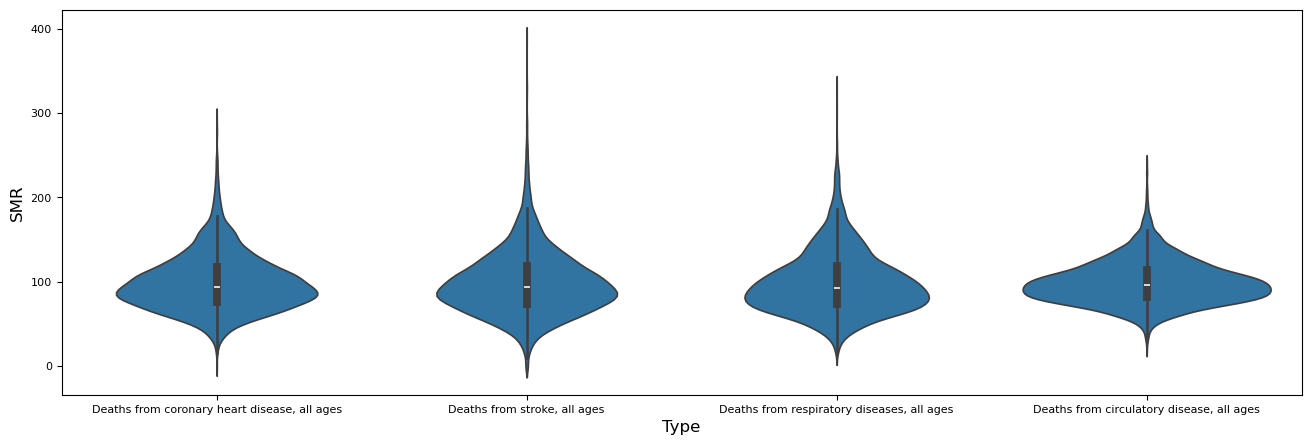

In [34]:
#Quantitative analysis of the distribution of death data from various diseases (units: SMR)
plt.figure(figsize=(16, 5))
col_show1 = ['Deaths from coronary heart disease, all ages','Deaths from stroke, all ages',
           'Deaths from respiratory diseases, all ages','Deaths from circulatory disease, all ages']
df_melt =analysis_data.melt(value_vars=col_show1)
sns.violinplot(x='variable', y='value', data=df_melt)
plt.xlabel('Type', fontsize=12)
plt.ylabel('SMR', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


From this observation, it's evident that the distribution ranges of mortality rates for coronary heart disease, stroke, and respiratory diseases are quite similar. However, in the data for the latter two diseases, there are more outliers or abnormal data points.

The mortality rate for circulatory diseases is closer to the predicted level and lower than the mortality rates for the first three diseases.

C:\Users\yh\AppData\Local\Temp\ipykernel_42824\2004701160.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(analysis_data['Limiting long-term illness or disability'],shade=True)


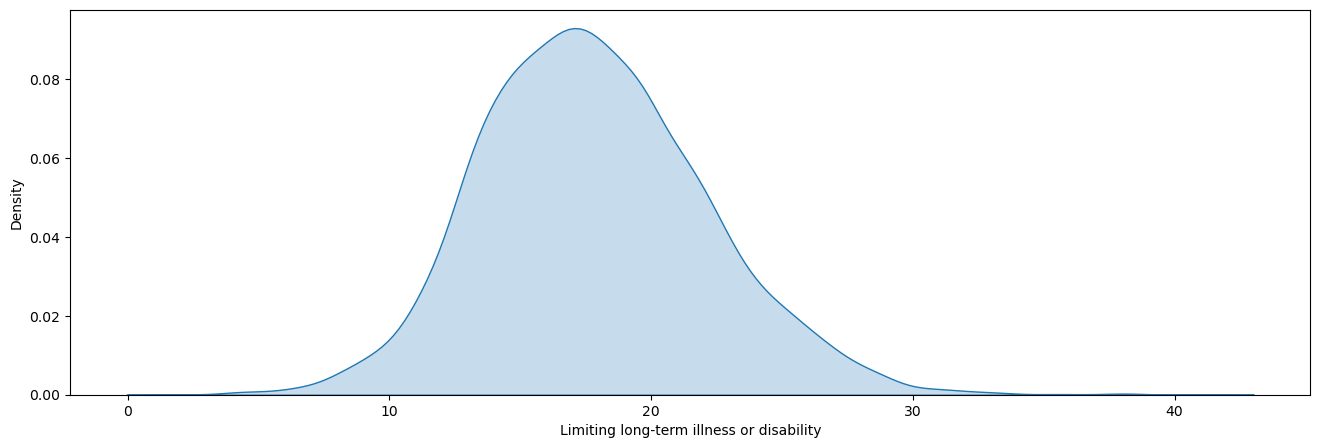

In [35]:
#Quantitative analysis of the incidence distribution of chronic diseases(units:%)
plt.figure(figsize=(16, 5))
sns.kdeplot(analysis_data['Limiting long-term illness or disability'],shade=True)
plt.show()

It can be seen that the incidence of chronic diseases shows a relatively obvious normal distribution, with the highest prevalence around 18%, and then slowly decreases to both sides. The overall incidence of this disease is not particularly high.

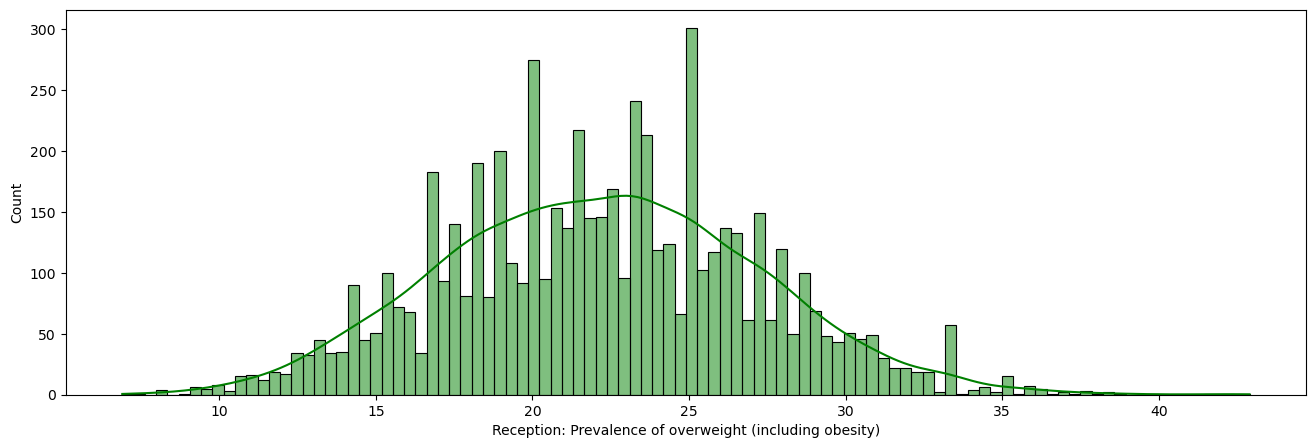

In [36]:
#Quantitative analysis of the prevalence distribution of overweight(units:%)
plt.figure(figsize=(16, 5))
sns.histplot(data=analysis_data, x='Reception: Prevalence of overweight (including obesity)', kde=True, color='green', bins=100)

plt.show()

The incidence rate of overweight also approximately shows a normal distribution. The incidence rate is highest in the 20%-25% range, and then slowly decreases. The overall incidence rate of this disease is not particularly high.

Import the terrain analysis module and import the British geographical information data

In [37]:
import geopandas as gpd

C:\Users\yh\AppData\Local\Temp\ipykernel_42824\3841419929.py:1: DeprecationWarning: GeoPandas is set to use PyGEOS over Shapely. PyGEOS support is deprecatedand will be removed in GeoPandas 1.0, released in the Q1 of 2024. Please migrate to Shapely 2.0 (https://geopandas.org/en/stable/docs/user_guide/pygeos_to_shapely.html).
  import geopandas as gpd


In [38]:
England_ward = gpd.read_file(r'C:\Users\yh\Documents\data science for urban systems\assessment2\Wards_December_2023\WD_DEC_2023_UK_BFC.shp')

In [39]:
#Modify the name of the column as the associated element and associate it with the previously integrated medical room data, retaining the parts common to the three.
England_ward.rename(columns={'WD23CD':'Ward code'},inplace=True)
merge_data = England_ward.merge(analysis_data, on='Ward code', how='inner')

In [40]:
merge_data.head()

Ward code         WD23NM WD23NMW   BNG_E   BNG_N   LONG    LAT  \
0  E05000932       Ainsdale    None  330510  412099 -3.052 53.601   
1  E05000933       Birkdale    None  333046  414534 -3.014 53.623   
2  E05000934  Blundellsands    None  330806  399928 -3.044 53.492   
3  E05000935      Cambridge    None  334745  419336 -2.989 53.666   
4  E05000936         Church    None  332033  397634 -3.025 53.471   

                               GlobalID  \
0  0b857405-c9c5-41dc-9d0d-9510ce8e6bb2   
1  9ca5532b-6405-4781-b653-e6da30952cf4   
2  11931abf-4470-46f9-a8b6-893519154ebe   
3  8bb5d5fc-e876-4657-a671-d902cdf322bf   
4  76397e39-1909-4041-8328-8349de1f13d6   

                                            geometry      Ward name  ...  \
0  POLYGON ((333004.896 413223.595, 332995.002 41...       Ainsdale  ...   
1  POLYGON ((334138.402 414944.403, 334101.300 41...       Birkdale  ...   
2  POLYGON ((332044.396 399981.496, 332044.998 39...  Blundellsands  ...   
3  POLYGON ((335388.299 421924.353, 335395.910 42...      Cambridge  ...   
4  POLYGON ((332791.399 398377.705, 332787.903 39...         Church  ...   

   Incidence of lung cancer  Incidence of prostate cancer  \
0                    91.100                        80.400   
1                   117.000                       103.500   
2                   101.600                       120.000   
3                    93.600                        74.000   
4                   164.000                        75.500   

   Limiting long-term illness or disability  \
0                                    23.100   
1                                    18.200   
2                                    18.400   
3                                    31.600   
4                                    23.600   

   Reception: Prevalence of overweight (including obesity)  \
0                                             25.500         
1                                             29.700         
2                                             20.500         
3                                             25.000         
4                                             21.800         

   Deaths from coronary heart disease, all ages  Deaths from stroke, all ages  \
0                                        94.300                        77.800   
1                                        86.400                        91.000   
2                                        68.300                       103.000   
3                                        88.300                       134.600   
4                                       117.700                       168.100   

   Deaths from respiratory diseases, all ages  \
0                                      73.100   
1                                      89.100   
2                                      75.600   
3                                     113.300   
4                                     145.900   

   Deaths from circulatory disease, all ages  \
0                                     88.900   
1                                     89.200   
2                                     77.700   
3                                    105.700   
4                                    128.600   

   Population whose ethnic group is not 'white'  Population density  
0                                         1.900            1525.400  
1                                         2.600            4045.200  
2                                         3.400            2330.100  
3                                         3.500            1531.200  
4                                         3.900            3495.500  

[5 rows x 27 columns]

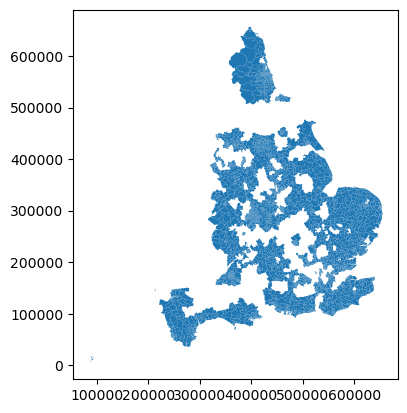

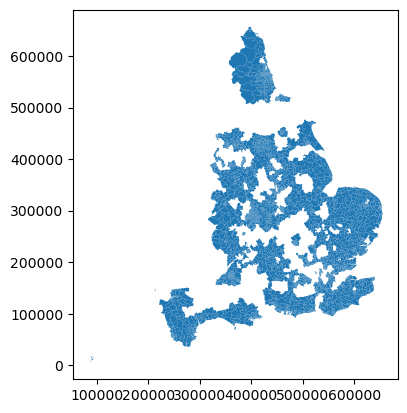

In [42]:
merge_data.plot()
plt.show()

The correlated data forms some blank areas in the middle and is not a complete British ward map. This is because some ward data are missing in the original statistics. 
In the process of table correlation, only relevant or meaningful data is preserved.

## Data Analysis and Results

After preliminary data integration processing, two dataframes were formed. The first is a table containing housing prices and disease information, and the second is a table containing housing prices, disease information, and geographical information.
The following analysis will first analyze the first dataframe to explore the relationship between housing prices and disease information; then analyze the second dataframe to explore the distribution of these different factors in the UK.

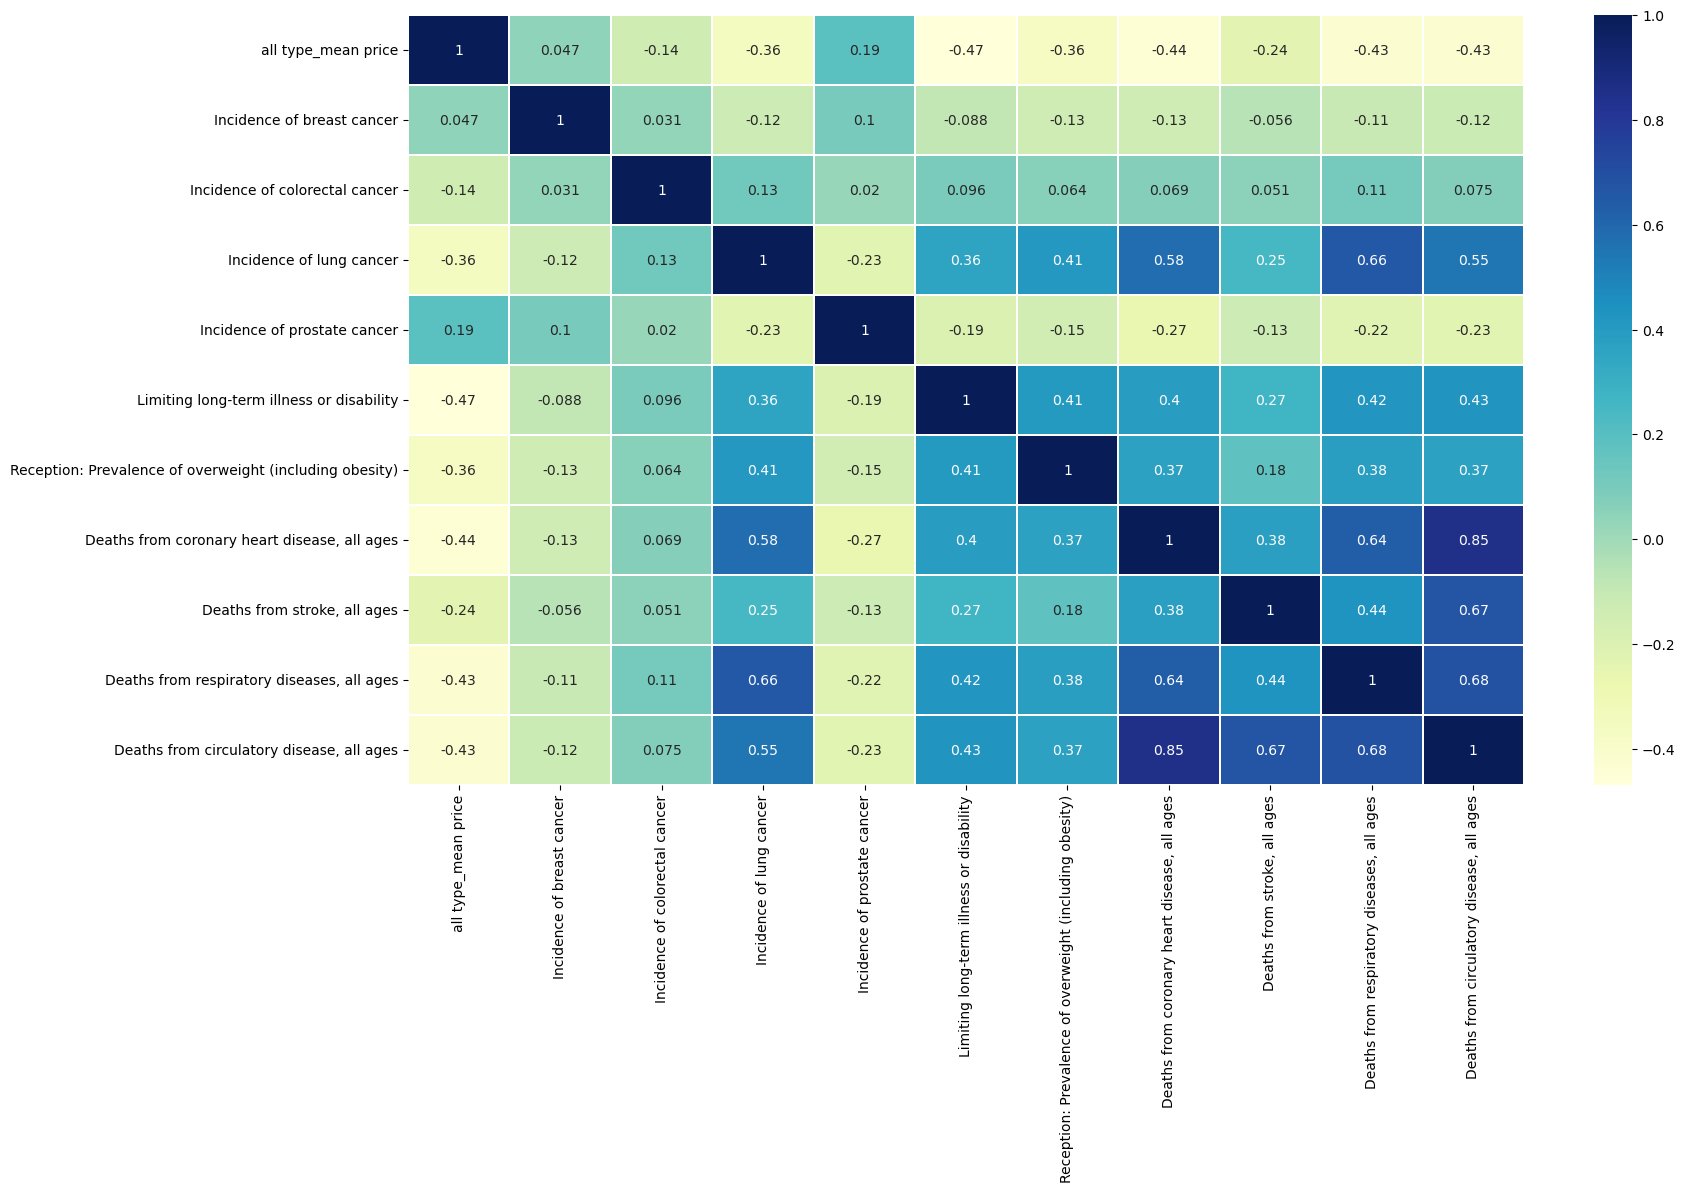

In [43]:
#Calculation of correlations between house price and the incidence of various diseases
analysis_data_cor = analysis_data.loc[:,('all type_mean price','Incidence of breast cancer', 
       'Incidence of colorectal cancer',
       'Incidence of lung cancer', 'Incidence of prostate cancer',
       'Limiting long-term illness or disability',
       'Reception: Prevalence of overweight (including obesity)',
       'Deaths from coronary heart disease, all ages',
       'Deaths from stroke, all ages',
       'Deaths from respiratory diseases, all ages',
       'Deaths from circulatory disease, all ages')]
corr = analysis_data_cor.corr()
fig,ax = plt.subplots(figsize=(18,10))
sns.heatmap(corr,annot=True,cmap='YlGnBu',linewidths=0.2)
plt.show()

In [44]:
analysis_data_cor.isna().sum()

all type_mean price                                          6
Incidence of breast cancer                                  56
Incidence of colorectal cancer                             116
Incidence of lung cancer                                   228
Incidence of prostate cancer                                69
Limiting long-term illness or disability                     0
Reception: Prevalence of overweight (including obesity)    527
Deaths from coronary heart disease, all ages                12
Deaths from stroke, all ages                                12
Deaths from respiratory diseases, all ages                  12
Deaths from circulatory disease, all ages                   12
dtype: int64

In [45]:
#Calculate the p value between each two variables to test whether there is significant statistical significance
from scipy.stats import pearsonr
analysis_data_cor_drop = analysis_data_cor.dropna()
results = pd.DataFrame(columns=['Variable1', 'Variable2', 'Correlation', 'P-value'])
for i in range(analysis_data_cor_drop.shape[1]):
    for j in range(i+1, analysis_data_cor_drop.shape[1]):
        var1 = analysis_data_cor_drop.columns[i]
        var2 = analysis_data_cor_drop.columns[j]
        corr, p_value = pearsonr(analysis_data_cor_drop[var1], analysis_data_cor_drop[var2])
        results = results.append({'Variable1': var1, 'Variable2': var2, 'Correlation': corr, 'P-value': p_value}, ignore_index=True)
results

C:\Users\yh\AppData\Local\Temp\ipykernel_42824\2384905050.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable1': var1, 'Variable2': var2, 'Correlation': corr, 'P-value': p_value}, ignore_index=True)
C:\Users\yh\AppData\Local\Temp\ipykernel_42824\2384905050.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable1': var1, 'Variable2': var2, 'Correlation': corr, 'P-value': p_value}, ignore_index=True)
C:\Users\yh\AppData\Local\Temp\ipykernel_42824\2384905050.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable1': var1, 'Variable2': var2, 'Correlation': corr, 'P-value': p_value}, ignore_index=True)
C:\Users\yh\AppData\Local

Variable1  \
0                                 all type_mean price   
1                                 all type_mean price   
2                                 all type_mean price   
3                                 all type_mean price   
4                                 all type_mean price   
5                                 all type_mean price   
6                                 all type_mean price   
7                                 all type_mean price   
8                                 all type_mean price   
9                                 all type_mean price   
10                         Incidence of breast cancer   
11                         Incidence of breast cancer   
12                         Incidence of breast cancer   
13                         Incidence of breast cancer   
14                         Incidence of breast cancer   
15                         Incidence of breast cancer   
16                         Incidence of breast cancer   
17                         Incidence of breast cancer   
18                         Incidence of breast cancer   
19                     Incidence of colorectal cancer   
20                     Incidence of colorectal cancer   
21                     Incidence of colorectal cancer   
22                     Incidence of colorectal cancer   
23                     Incidence of colorectal cancer   
24                     Incidence of colorectal cancer   
25                     Incidence of colorectal cancer   
26                     Incidence of colorectal cancer   
27                           Incidence of lung cancer   
28                           Incidence of lung cancer   
29                           Incidence of lung cancer   
30                           Incidence of lung cancer   
31                           Incidence of lung cancer   
32                           Incidence of lung cancer   
33                           Incidence of lung cancer   
34                       Incidence of prostate cancer   
35                       Incidence of prostate cancer   
36                       Incidence of prostate cancer   
37                       Incidence of prostate cancer   
38                       Incidence of prostate cancer   
39                       Incidence of prostate cancer   
40           Limiting long-term illness or disability   
41           Limiting long-term illness or disability   
42           Limiting long-term illness or disability   
43           Limiting long-term illness or disability   
44           Limiting long-term illness or disability   
45  Reception: Prevalence of overweight (including...   
46  Reception: Prevalence of overweight (including...   
47  Reception: Prevalence of overweight (including...   
48  Reception: Prevalence of overweight (including...   
49       Deaths from coronary heart disease, all ages   
50       Deaths from coronary heart disease, all ages   
51       Deaths from coronary heart disease, all ages   
52                       Deaths from stroke, all ages   
53                       Deaths from stroke, all ages   
54         Deaths from respiratory diseases, all ages   

                                            Variable2  Correlation  P-value  
0                          Incidence of breast cancer        0.048    0.000  
1                      Incidence of colorectal cancer       -0.156    0.000  
2                            Incidence of lung cancer       -0.363    0.000  
3                        Incidence of prostate cancer        0.199    0.000  
4            Limiting long-term illness or disability       -0.493    0.000  
5   Reception: Prevalence of overweight (including...       -0.363    0.000  
6        Deaths from coronary heart disease, all ages       -0.457    0.000  
7                        Deaths from stroke, all ages       -0.255    0.000  
8          Deaths from respiratory diseases, all ages       -0.447    0.000  
9           Deaths from circulatory disease, all ages       -0.437    0

From the above analysis, it can be seen that there is a significant statistical correlation between the average house price and the morbidity and mortality rate of various diseases.
The heatmap reveals that, with the exceptions of 'Incidence of breast cancer' and 'Incidence of prostate cancer,' there is a noticeable negative correlation between average house prices and disease incidence. Among these, 'Limiting long-term illness or disability' and 'Deaths from respiratory diseases, all ages' have the most pronounced adverse influence on average house prices.

In [46]:
#Draw a pairplot to graphically express the relationship between variables
plt.figure(figsize=(20,20))
sns.pairplot(analysis_data,kind='reg',diag_kind='kde')

<Figure size 2000x2000 with 0 Axes>

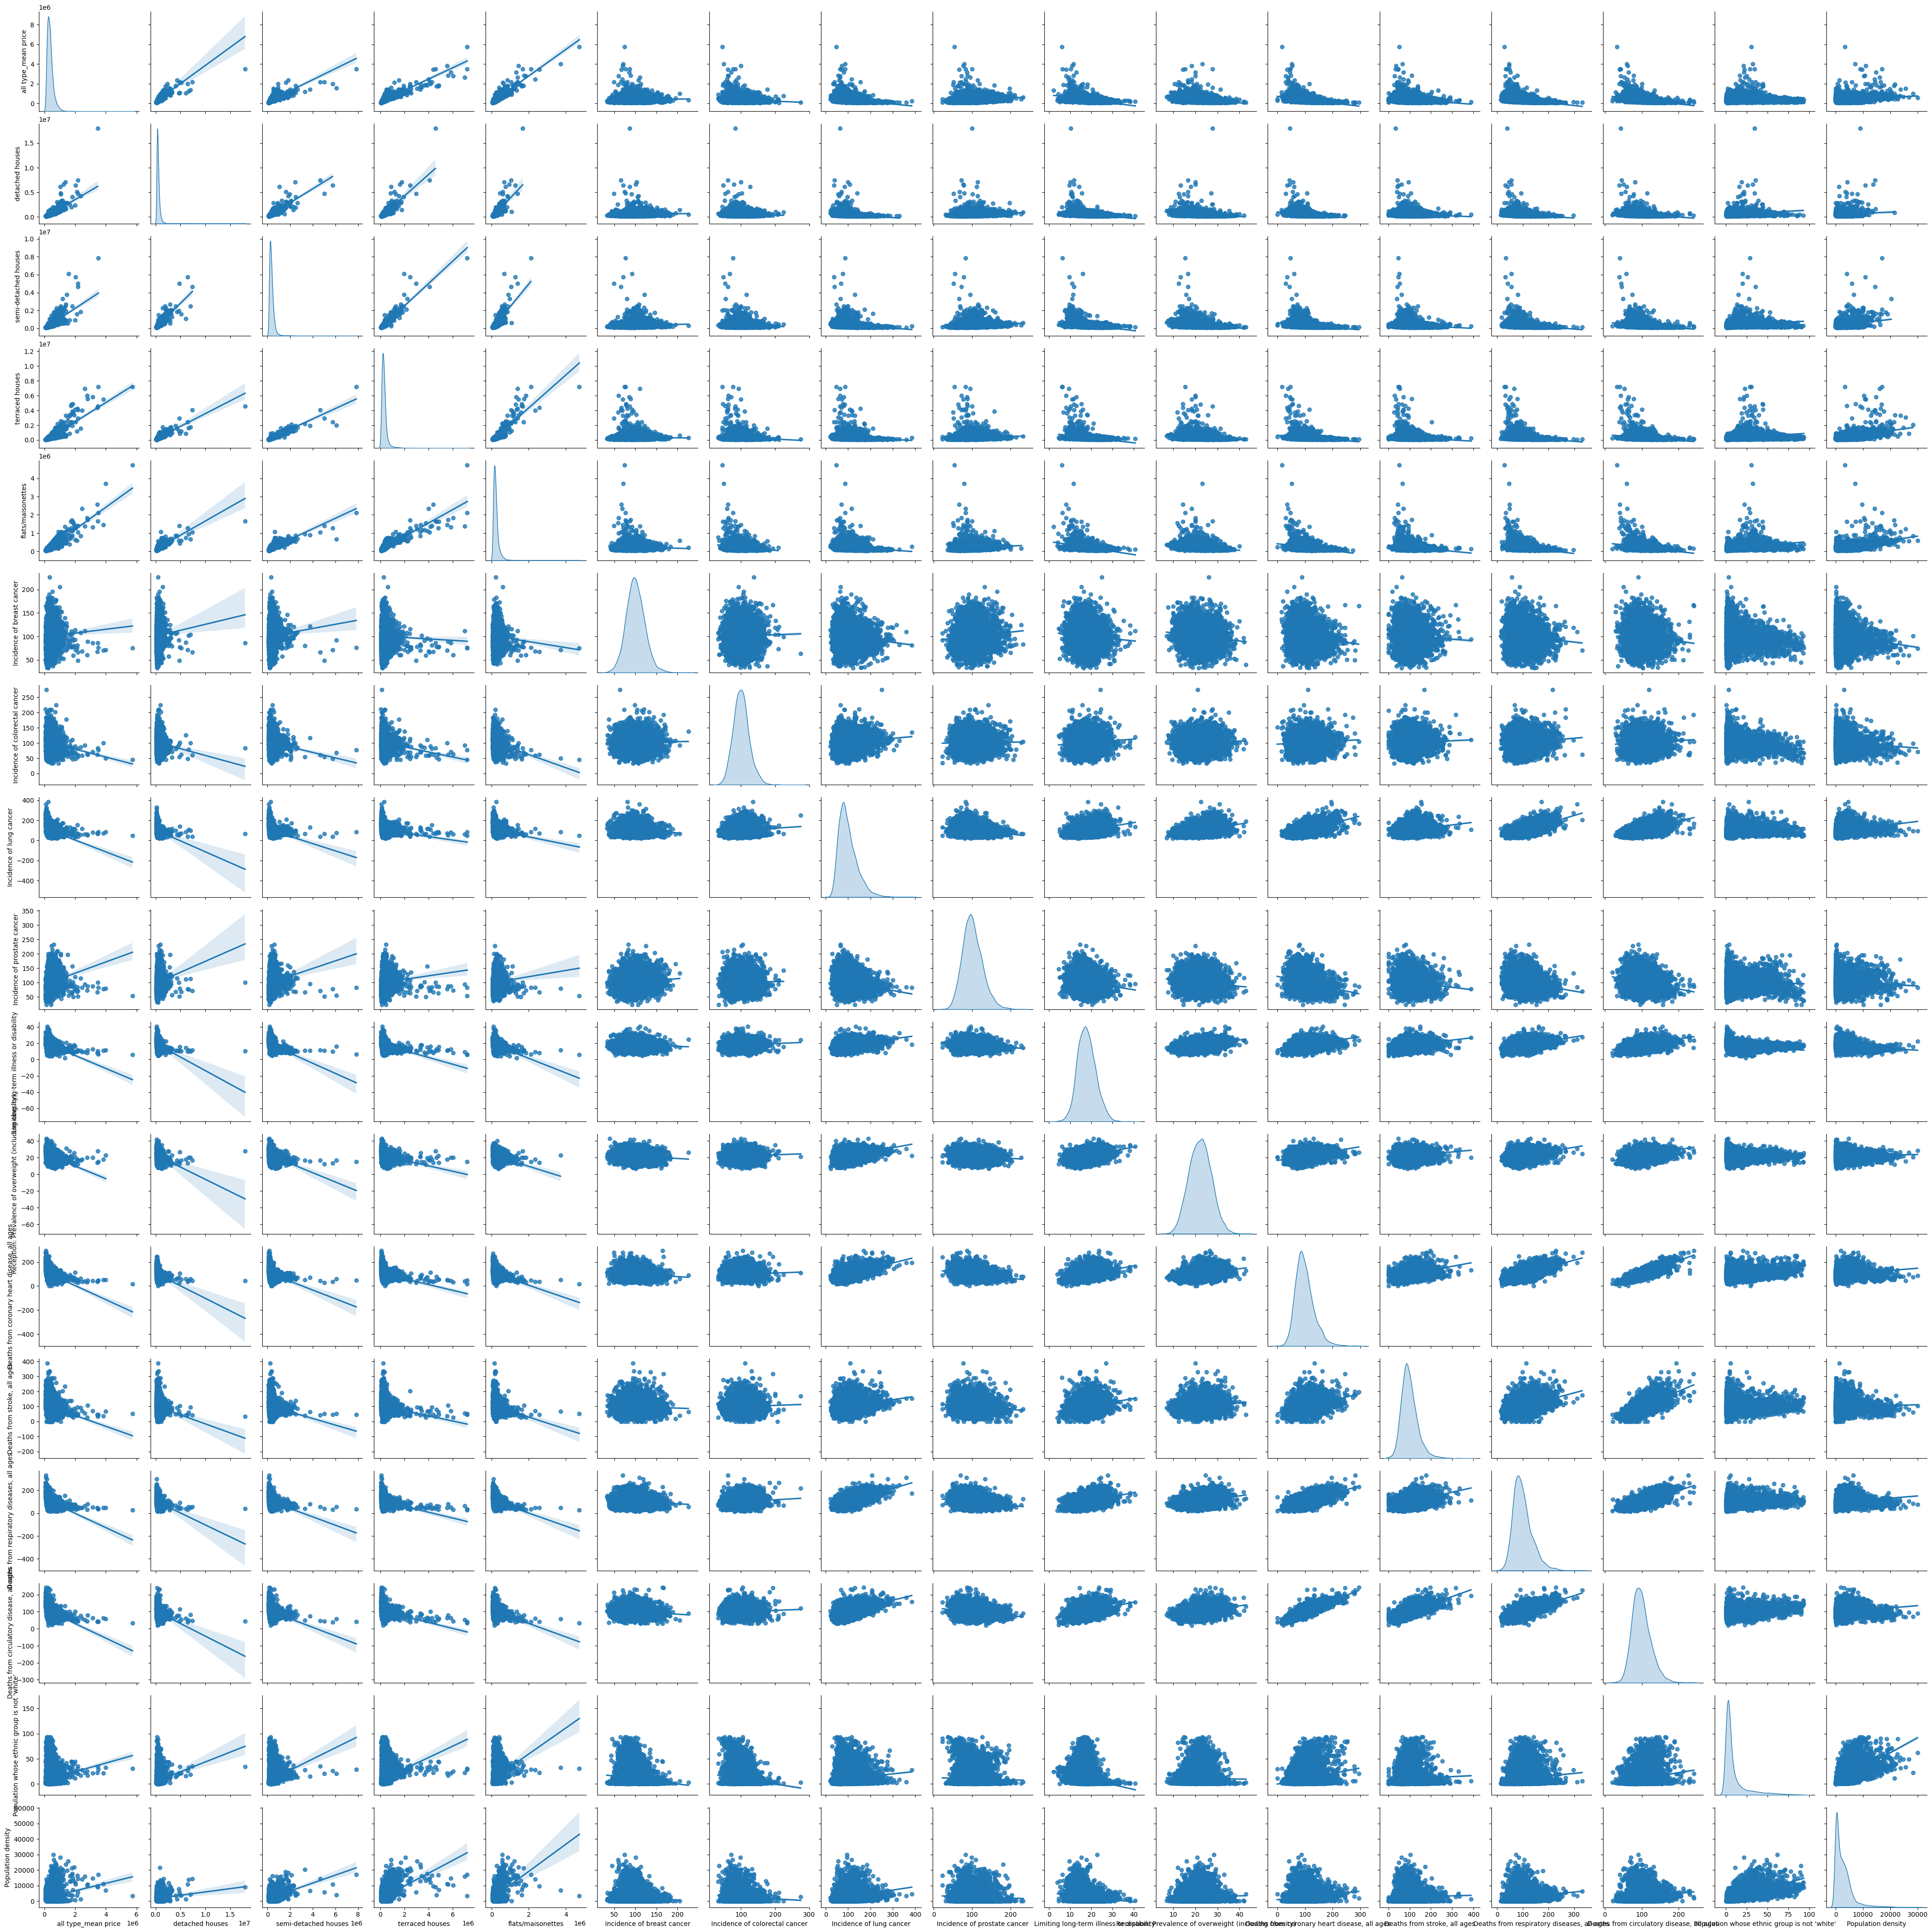

In [47]:
plt.show()

From the pairplot, we can intuitively see that there is a linear correlation between the average house price and the incidence of diseases.
Select the two variables with the highest correlation and try to quantify them.

In [48]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [49]:
#to quantify the regression relationship between 'Limiting long-term illness or disability' and average house prices.
y = analysis_data_cor_drop['Limiting long-term illness or disability']
X = analysis_data_cor_drop['all type_mean price']

In [50]:
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()
print(results.summary())

                                       OLS Regression Results                                       
Dep. Variable:     Limiting long-term illness or disability   R-squared:                       0.243
Model:                                                  OLS   Adj. R-squared:                  0.243
Method:                                       Least Squares   F-statistic:                     1858.
Date:                                      Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                                              21:54:05   Log-Likelihood:                -15764.
No. Observations:                                      5784   AIC:                         3.153e+04
Df Residuals:                                          5782   BIC:                         3.155e+04
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

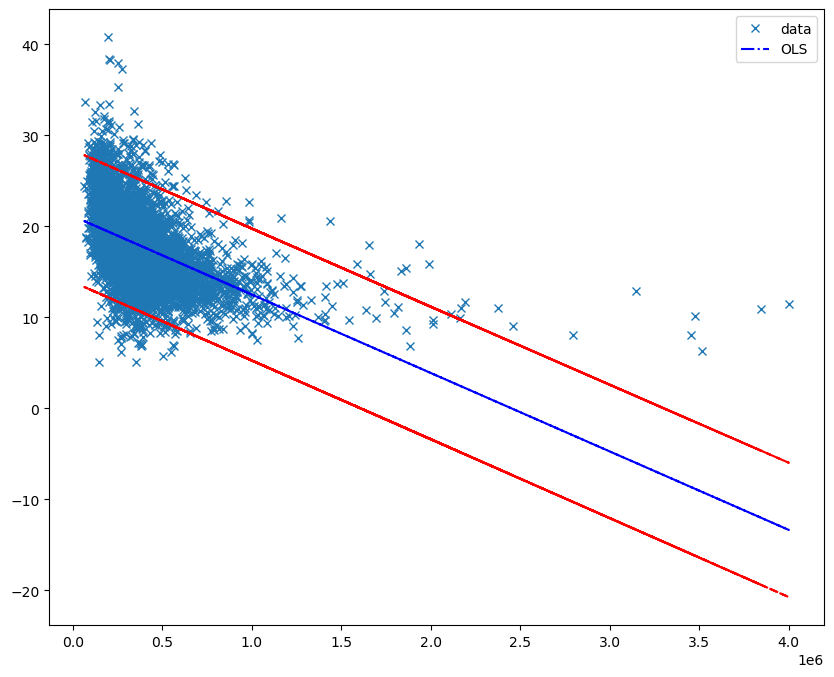

In [51]:
res = sm.OLS(y, x1).fit()
prstd, iv_l, iv_u = wls_prediction_std(res) 
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X, y, 'x', label="data")
ax.plot(X, res.fittedvalues, 'b-.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best')
fig

In [52]:
#to quantify the regression relationship between 'Deaths from respiratory diseases, all ages' and average house prices.
y = analysis_data_cor_drop['Deaths from respiratory diseases, all ages']
X = analysis_data_cor_drop['all type_mean price']

In [53]:
x1 = sm.add_constant(X)
mod = sm.OLS(y, x1)
results = mod.fit()
print(results.summary())

                                        OLS Regression Results                                        
Dep. Variable:     Deaths from respiratory diseases, all ages   R-squared:                       0.200
Model:                                                    OLS   Adj. R-squared:                  0.200
Method:                                         Least Squares   F-statistic:                     1447.
Date:                                        Mon, 22 Jan 2024   Prob (F-statistic):          7.71e-283
Time:                                                21:54:42   Log-Likelihood:                -28380.
No. Observations:                                        5784   AIC:                         5.676e+04
Df Residuals:                                            5782   BIC:                         5.678e+04
Df Model:                                                   1                                         
Covariance Type:                                    nonrobust            

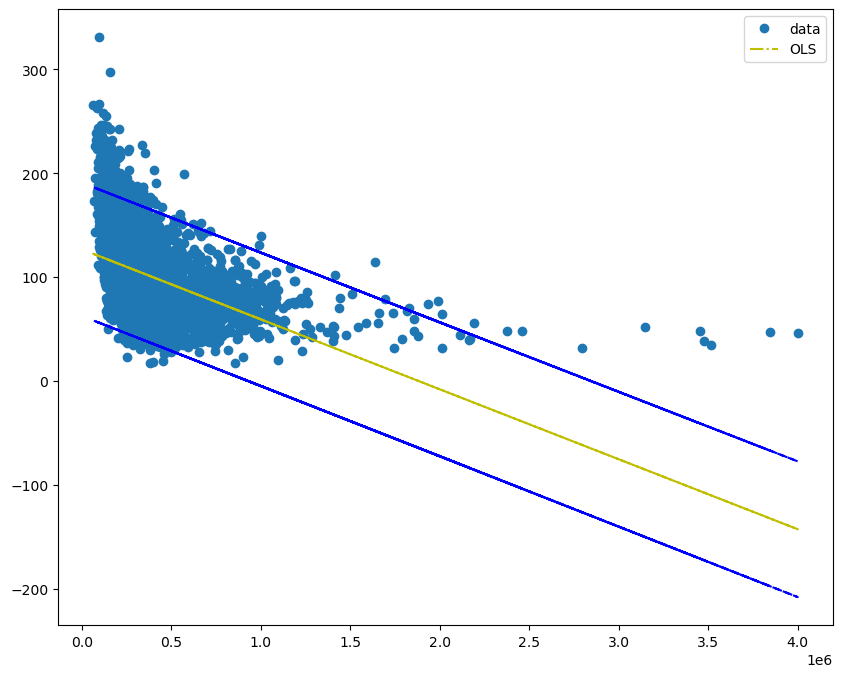

In [54]:
res = sm.OLS(y, x1).fit()
prstd, iv_l, iv_u = wls_prediction_std(res) 
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(X, y, 'o', label="data")
ax.plot(X, res.fittedvalues, 'y-.', label="OLS")
ax.plot(X, iv_u, 'b--')
ax.plot(X, iv_l, 'b--')
ax.legend(loc='best')
fig

'Limiting long-term illness or disability'and 'Deaths from respiratory diseases, all ages' have a
negative association with average house price，and they are all statistically significant as they all have a p-value less than 0.05.

Next, classify the data and use a variety of machine learning methods to build models

In [56]:
import math
pd.options.mode.chained_assignment = None
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as metrics
from sklearn.impute import KNNImputer

Due to the excessive presence of NaN values in a specific type of average house price data, processing it could potentially impact the final analysis results. Therefore, data from all types are chosen for analysis, and the average house price data is utilized for classification purposes.


In [57]:
#First, KMN is used to fill in the nan values in the data.
analysis_data_sub = analysis_data[['all type_mean price']]
analysis_data_sub_array = analysis_data_sub.to_numpy()
imput = KNNImputer(n_neighbors=5)
analysis_data_sub_imput = imput.fit_transform(analysis_data_sub_array)


Because there is no universal standard for grading the average house price. AgglomerativeClustering is used to divide the average house price into several clusters to facilitate subsequent model construction.

In [58]:
#After filling in the nan value, use hierarchical clustering analysis to classify the data, calculate its score, and assign the classification label
ag = AgglomerativeClustering(distance_threshold=None, n_clusters=3) 
ag.fit(analysis_data_sub_imput)
ag_label = ag.labels_
#analysis_data_sub_imput['agcluster']=ag_label
print(metrics.silhouette_score(analysis_data_sub_imput,ag_label))


0.6555080812131998


The score is fine, which proves that this clustering selection method is more reasonable.

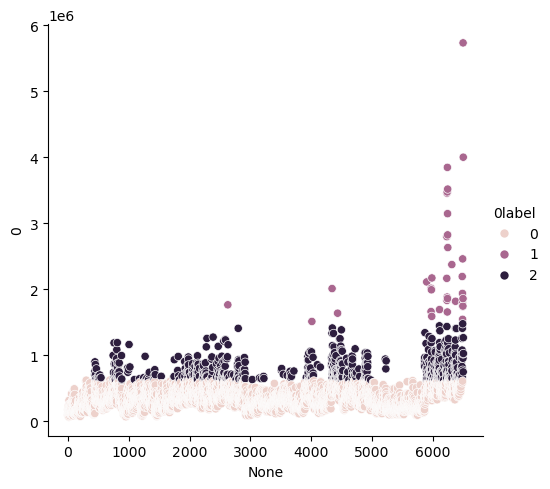

In [60]:
#Combine the classification tags and the average price of all types of houses and convert them into a dataframe
analysis_data_trans = pd.DataFrame(analysis_data_sub_imput)
label_trans = pd.DataFrame(ag_label)
analysis_data_trans=analysis_data_trans.join(label_trans,how='right',rsuffix='label')
analysis_data_trans['0']
fig =sns.relplot(y=analysis_data_trans['0'],x=analysis_data_trans.index,data=analysis_data_trans,hue='0label')
plt.show()

In [62]:
analysis_data['price_lable']=analysis_data_trans['0label']

Based on the original data records, when SMR (Standardized Mortality Ratio) and SIR (Standardized Incidence Ratio) exceed 100, it indicates that the morbidity or mortality rate in the area's population is higher than that of the standard population.
when the SMR and SIR are less than 100, it proves the risk of the group in the area is small, which means people in better health.

In [63]:
#Classify disease morbidity and mortality
analysis_data['Incidence of breast cancer_label']=np.where(analysis_data['Incidence of breast cancer']>100,1,0)
analysis_data['Incidence of colorectal cancer_label']=np.where(analysis_data['Incidence of colorectal cancer']>100,1,0)
analysis_data['Incidence of lung cancer_label']=np.where(analysis_data['Incidence of lung cancer']>100,1,0)
analysis_data['Incidence of prostate cancer_label']=np.where(analysis_data['Incidence of prostate cancer']>100,1,0)
analysis_data['Deaths from coronary heart disease, all ages_label']=np.where(analysis_data['Deaths from coronary heart disease, all ages']>100,1,0)
analysis_data['Deaths from stroke, all ages_label']=np.where(analysis_data['Deaths from stroke, all ages']>100,1,0)
analysis_data['Deaths from respiratory diseases, all ages_label']=np.where(analysis_data['Deaths from respiratory diseases, all ages']>100,1,0)
analysis_data['Deaths from circulatory disease, all ages_label']=np.where(analysis_data['Deaths from circulatory disease, all ages']>100,1,0)
analysis_data

Ward code                  Ward name  all type_mean price  \
0     E05009855  Berwick Hills & Pallister            90872.807   
1     E05009853                     Acklam           175045.117   
2     E05009856       Brambles & Thorntree            97968.880   
3     E05009854                   Ayresome           125880.671   
4     E05009869                       Park           126473.431   
...         ...                        ...                  ...   
6498  E05000645                  Tachbrook          1018946.959   
6499  E05000648                 Westbourne           747059.942   
6500  E05000649                   West End          4001252.954   
6501  E05000647                    Warwick          1266360.602   
6502  E05000646             Vincent Square          1026763.851   

      detached houses  semi-detached houses  terraced houses  \
0                 NaN             98750.000        80041.667   
1          336687.500            174972.137       120618.125   
2                 NaN            104812.714        79269.154   
3                 NaN            146667.649        97712.464   
4                 NaN            163459.231       109986.737   
...               ...                   ...              ...   
6498              NaN                   NaN      2059500.000   
6499              NaN                   NaN              NaN   
6500              NaN                   NaN              NaN   
6501              NaN                   NaN      2346731.889   
6502              NaN                   NaN              NaN   

      flats/maisonettes  Incidence of breast cancer  \
0                   NaN                     118.800   
1             89645.000                      92.800   
2                   NaN                     109.500   
3                   NaN                      81.500   
4             68495.455                      99.300   
...                 ...                         ...   
6498         856360.547                     101.100   
6499         692736.807                      78.600   
6500        3706017.217                      71.400   
6501        1050286.344                      78.400   
6502         990036.656                      60.800   

      Incidence of colorectal cancer  Incidence of lung cancer  ...  \
0                            131.700                   298.800  ...   
1                            121.500                    96.000  ...   
2                                NaN                   360.300  ...   
3                            142.400                   230.200  ...   
4                            110.000                   159.600  ...   
...                              ...                       ...  ...   
6498                          98.800                    94.900  ...   
6499                          85.400                   165.000  ...   
6500                          49.600                    86.000  ...   
6501                          58.800                    77.000  ...   
6502                          75.100                   106.400  ...   

      Population density  price_lable  Incidence of breast cancer_label  \
0               4122.000            0                                 1   
1               2935.500            0                                 0   
2               3382.500            0                                 1   
3               2662.200            0                                 0   
4               6163.300            0                                 0   
...                  ...          ...                               ...   
6498           28277.700            2                                 1   
6499           22135.900            2                                 0   
6500            7038.200            1                                 0   
6501           18899.700            2                                 0   
6502           21564.700            2                                 0   

      Incidence o

In [64]:
#construct labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_fea = le.fit_transform(analysis_data['price_lable']) 

In [65]:
from sklearn.model_selection import train_test_split
analysis_data_model = analysis_data[[ 'Incidence of breast cancer_label',
       'Incidence of colorectal cancer_label',
       'Incidence of lung cancer_label', 'Incidence of prostate cancer_label',
       'Deaths from coronary heart disease, all ages_label',
       'Deaths from stroke, all ages_label',
       'Deaths from respiratory diseases, all ages_label',
       'Deaths from circulatory disease, all ages_label']]
analysis_data_model_array = analysis_data_model.to_numpy()

In [66]:
#Divide training data and test data
train_data, test_data, train_lab, test_lab = train_test_split(analysis_data_model, labels_fea)

In [67]:
#Build a random forest model
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier(random_state=200)
forest_model.fit(train_data,train_lab)
forest_model.score(test_data, test_lab)

0.8929889298892989

This score represents that the random forest model has a better prediction effect.

In [68]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import the shap module to calculate the contribution of each feature in the analysis model

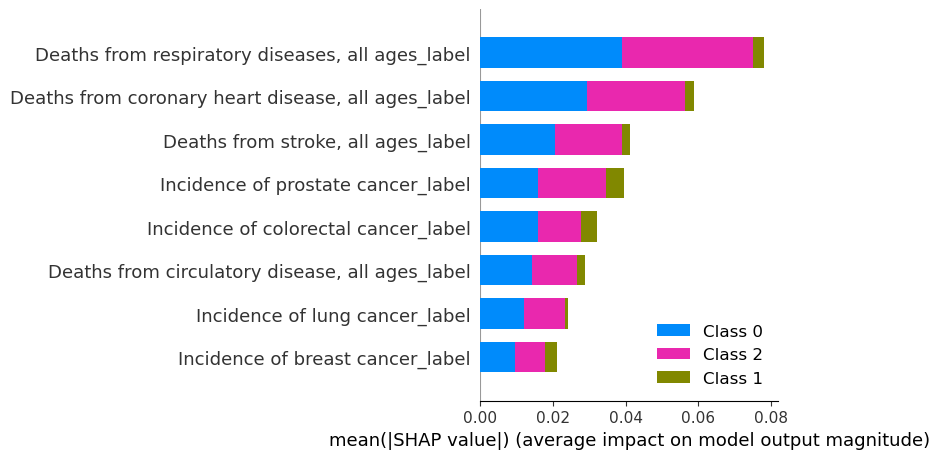

In [69]:
import shap
explain = shap.TreeExplainer(forest_model)
shap_value = explain.shap_values(test_data)
shap.summary_plot(shap_value,test_data)

The shap values of this model are all positive, which means that they increase the predicted value of the model output.
‘Deaths from respiratory disease, all ages_label’ and ‘Deaths from coronary heart disease, all ages_label’ have the greatest impact on the prediction results of the lower and higher average house prices in the model.
All indicators have a relatively close impact on the prediction results of the average house price at the middle value.

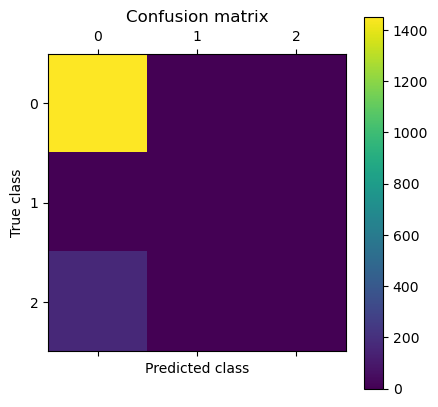

In [70]:
#construct confuse matrix
from sklearn.metrics import confusion_matrix
predicion = forest_model.predict(test_data)
pred = pd.DataFrame(list(predicion))
confusion_matrix = metrics.confusion_matrix(test_lab,pred)
plt.matshow(confusion_matrix)
plt.colorbar() 
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [71]:
print(metrics.classification_report(test_lab, pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1452
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00       169

    accuracy                           0.89      1626
   macro avg       0.30      0.33      0.31      1626
weighted avg       0.80      0.89      0.84      1626



Based on the images and tables in the confusion matrix, it's evident that this model performs well in predicting data types with lower average house prices, but it consistently fails to make accurate predictions for data types with higher average house prices.
Next, let's switch to an alternative prediction model to determine if it can address this issue more effectively.

In [72]:
# construct model
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=15)  
kn_model.fit(train_data, train_lab)
kn_model.score(test_data, test_lab)

0.8929889298892989

This score represents that the random forest model has a better prediction effect.

In [73]:
prediction = kn_model.predict(test_data)
pred = pd.DataFrame(list(predicion))
confusion_matrix = metrics.confusion_matrix(test_lab,pred)

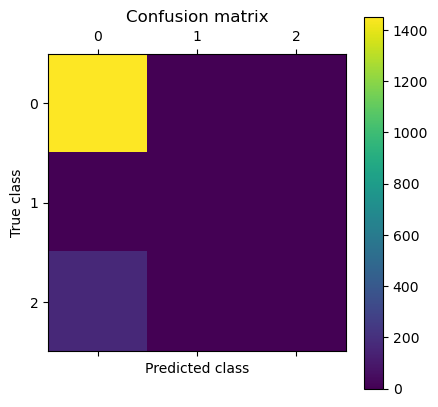

In [74]:
plt.matshow(confusion_matrix)
plt.colorbar() 
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [75]:
print(metrics.classification_report(test_lab, pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1452
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00       169

    accuracy                           0.89      1626
   macro avg       0.30      0.33      0.31      1626
weighted avg       0.80      0.89      0.84      1626



The result is quite similar to the result of randomforest. It's evident that this model performs well in predicting data types with lower average house prices, but it consistently fails to make accurate predictions for data types with higher average house prices.

If there are more data available for training with higher average house prices, it's possible that the prediction results could be more favorable.

To analyze the second merged dataframe, which involves spatial analysis of disease incidence and mortality rates as well as average house prices in the UK

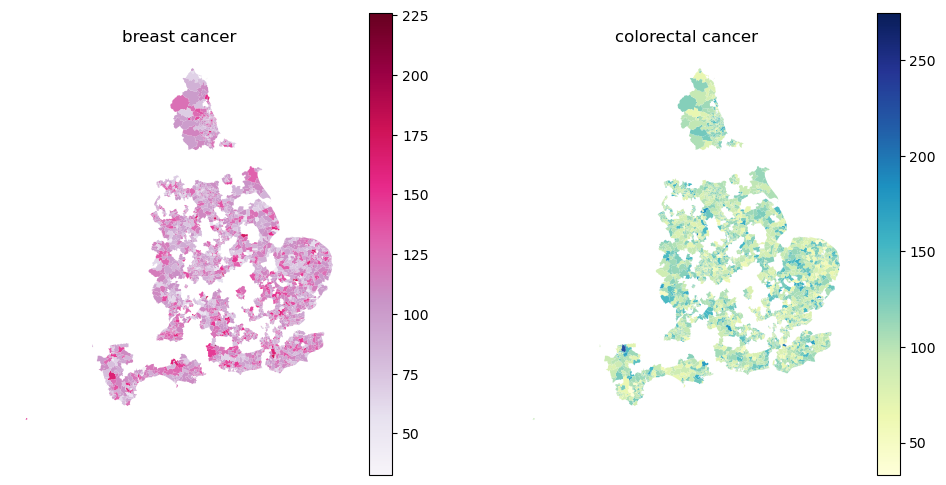

In [79]:
#Create a spatial distribution map of the incidence rate
fig,axs = plt.subplots(1,2,figsize=(12,6))
merge_data.plot(ax =axs[0],column='Incidence of breast cancer',cmap='PuRd', legend=True)
axs[0].set_title('breast cancer')
axs[0].axis('off')
merge_data.plot(ax =axs[1],column='Incidence of colorectal cancer',cmap='YlGnBu', legend=True)
axs[1].set_title('colorectal cancer')
axs[1].axis('off')
plt.show()

The spatial distribution characteristics of ‘Incidence of breast cancer’ and ‘Incidence of colorectal cancer’ are not obvious enough.

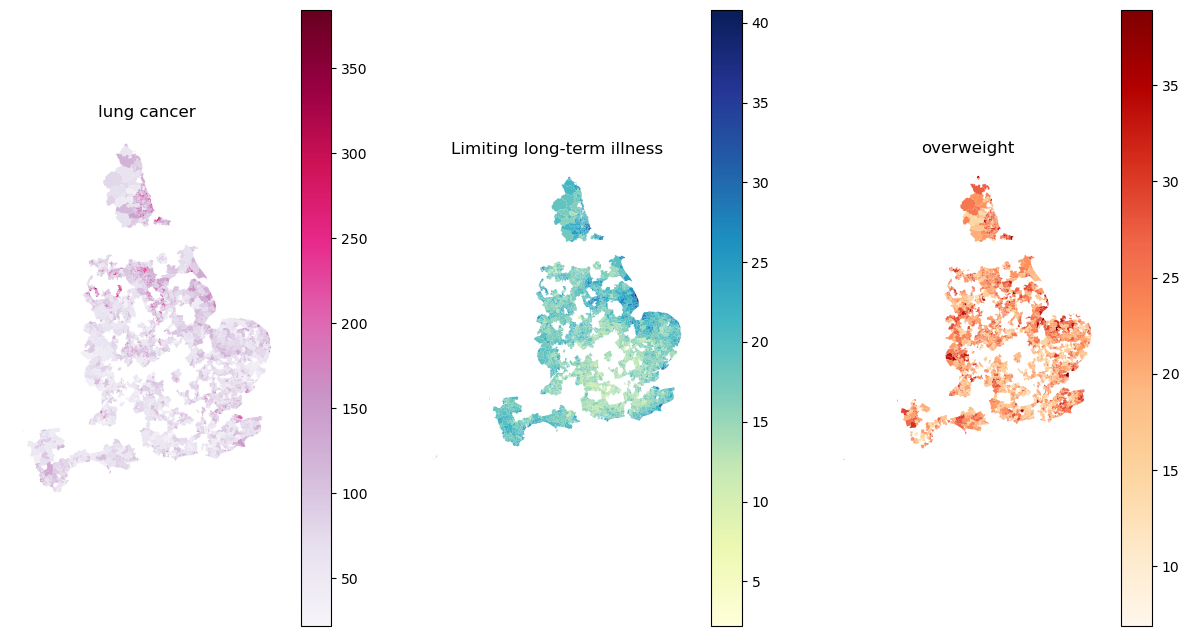

In [80]:
#Create a spatial distribution map of the incidence rate
fig,axs = plt.subplots(1,3,figsize=(15,8))
merge_data.plot(ax =axs[0],column='Incidence of lung cancer',cmap='PuRd', legend=True)
axs[0].set_title('lung cancer')
axs[0].axis('off')
merge_data.plot(ax =axs[1],column='Limiting long-term illness or disability',cmap='YlGnBu', legend=True)
axs[1].set_title('Limiting long-term illness')
axs[1].axis('off')
merge_data.plot(ax =axs[2],column='Reception: Prevalence of overweight (including obesity)',cmap='OrRd', legend=True)
axs[2].set_title('overweight')
axs[2].axis('off')
plt.show()

The incidence rate of Incidence of lung cancer in the northern region is lower than that in the southern region, and the incidence rate of Limited long-term illness or disability and overweight in the central region is significantly lower than that in other regions.

In [81]:
#Data preprocessing.
#In each housing price category, there are a few significantly large outliers. These outliers can affect the visualization of the geographic distribution map. 
#Therefore, the larger outliers will be replaced with the mean value."
upper_limit = np.percentile(merge_data['all type_mean price'], 90)
merge_data['all type_mean price_trim'] = merge_data['all type_mean price'].apply(lambda x: min(x, upper_limit))

upper_limit1 = np.percentile(merge_data['detached houses'], 90)
merge_data['detached houses_trim'] = merge_data['detached houses'].apply(lambda x: min(x, upper_limit1))

upper_limit2 = np.percentile(merge_data['semi-detached houses'], 90)
merge_data['semi-detached houses_trim'] = merge_data['semi-detached houses'].apply(lambda x: min(x, upper_limit2))

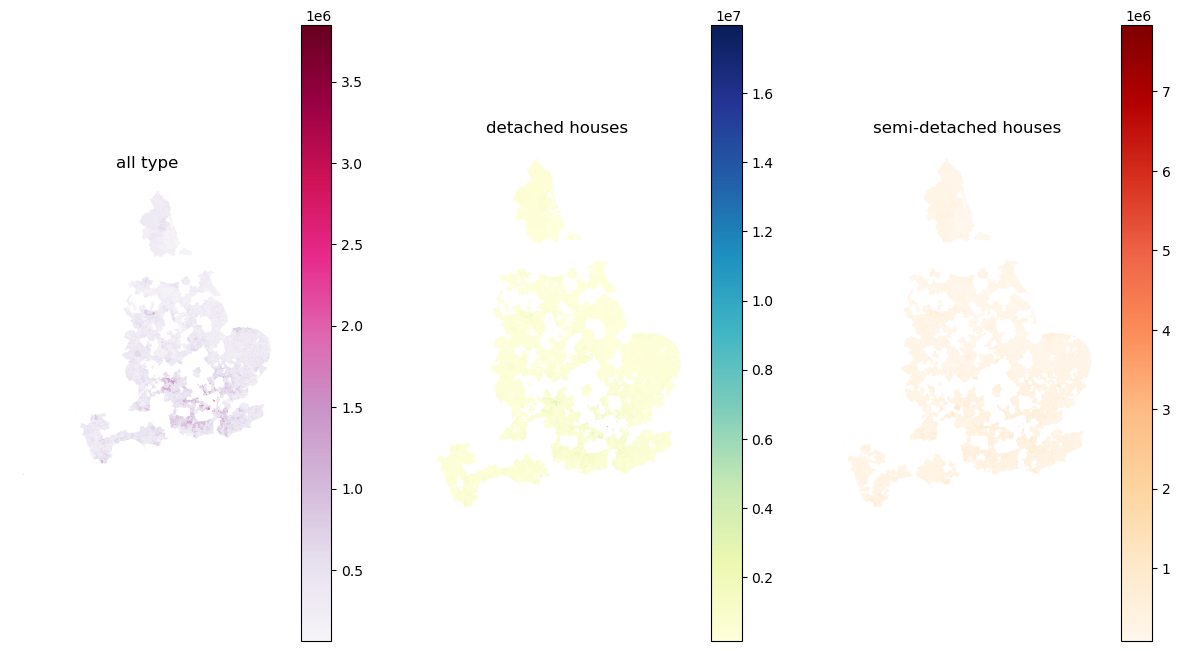

In [82]:
#Create a spatial distribution map of the house price
fig,axs = plt.subplots(1,3,figsize=(15,8))
merge_data.plot(ax =axs[0],column='all type_mean price_trim',cmap='PuRd', legend=True)
axs[0].set_title('all type')
axs[0].axis('off')
merge_data.plot(ax =axs[1],column='detached houses_trim',cmap='YlGnBu', legend=True)
axs[1].set_title('detached houses')
axs[1].axis('off')
merge_data.plot(ax =axs[2],column='semi-detached houses_trim',cmap='OrRd', legend=True)
axs[2].set_title('semi-detached houses')
axs[2].axis('off')
plt.show()

When it comes to the average house prices for all types , the prices in the central and southern regions of the UK surpass those in other regions. However, for the average house prices of other types of houses, the imperfect statistical data makes it challenging to discern any specific patterns.
Based on the available data, the overall distribution appears to be relatively balanced.

In [83]:
#Data preprocessing to deal with large outliers
upper_limit3 = np.percentile(merge_data['terraced houses'], 90)
merge_data['terraced houses_trim'] = merge_data['terraced houses'].apply(lambda x: min(x, upper_limit3))
upper_limit4 = np.percentile(merge_data['flats/maisonettes'], 90)
merge_data['flats/maisonettes_trim'] = merge_data['flats/maisonettes'].apply(lambda x: min(x, upper_limit4))

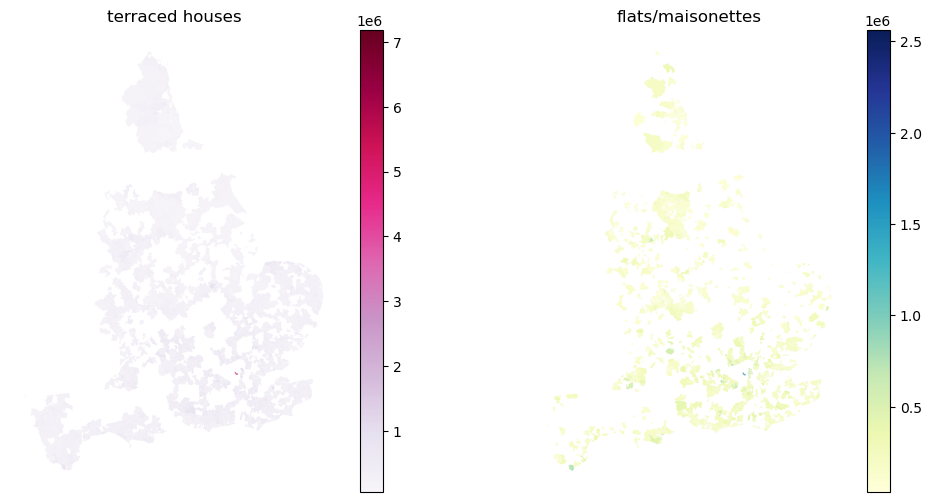

In [84]:
#Create a spatial distribution map of the house price
fig,axs = plt.subplots(1,2,figsize=(12,6))
merge_data.plot(ax =axs[0],column='terraced houses_trim',cmap='PuRd', legend=True)
axs[0].set_title('terraced houses')
axs[0].axis('off')
merge_data.plot(ax =axs[1],column='flats/maisonettes',cmap='YlGnBu', legend=True)
axs[1].set_title('flats/maisonettes')
axs[1].axis('off')
plt.show()

The spatial distribution map of the average terraced houses prices is quite even. The spatial distribution map of the average flat prices shows that only several wards have higher average prices, while the prices in the remaining wards are relatively balanced.

## Discussion

From the spatial distribution analysis of limiting long-term illness or disability, it is showed that the central-southern area exhibits a lower incidence rate. Moreover, the spatial distribution of average house price across all housing types also indicates that the central-southern area has higher price compared to others, which aligns well with the results of the preceding correlation analysis.


From an academic perspective, this research topic has significant potential for practical application. Both the general public and researchers  who have a keen interest in disease patterns and housing prices. Further refinement of the existing data, with detailed supplementation of wards across the entire United Kingdom, could make each individual study valuable. The spatial distribution of average housing prices has practical implications for ordinary individuals in terms of relocation and property decisions. Besides, the spatial distribution of disease incidence can influence people's willingness to reside in a particular area.

In future researches, larger and more diverse databases for data analysis, such as examining the relationship between disease incidence and housing prices on a European scale, could be taken into consideration. Additionally, exploring potential influencing factors could be evaluated, such as the distribution of ethnicity and age.

Further refining our models with advanced machine learning techniques and incorporating more world healthcare data could also enhance the accuracy and utility of our predictions.

This small-scale project only explores the correlation between disease incidence and housing prices. At present, it is uncertain whether disease incidence affects housing prices or vice versa. Investigating the causal relationship between these two factors could be a promising direction for future research.

Furthermore, disease incidence, housing prices, demographic factors and some underlying factors such as ethnicity and age may exhibit substantial interrelationships. The following researches could focus on the diseases most strongly associated with average housing prices and incorporate additional confounding factors, such as ethnicity and age distribution.

Additionally, this study is limited by the dataset. The study was confined to specific areas and particular health data, which could potentially impact the accuracy and precision of predictions and analyses.

## Conclusion

Based on the findings of this study, there is indeed a certain degree of correlation between disease incidence and mortality rates with housing prices, primarily characterized by a negative correlation. Higher disease incidence rates are associated with lower average housing prices, while areas with higher average housing prices tend to exhibit lower disease incidence rates. However, it is not possible to definitively establish a causal relationship between these factors based on the existing data. Notably, coronary heart disease rate and long-term limited illness have the most significant influence on average housing prices.

Furthermore, when considering the spatial distribution of average housing prices and disease incidence rates, it is observed that the central and central-southern areas of the United Kingdom have relatively lower disease incidence rates, despite higher average housing prices.

As a study of urban data science, this project establishes a connection between two distinct fields of data, exploring their distribution trends within the United Kingdom. For researchers who are in the real estate industry, it can help to build housing price prediction models, incorporate health indicators as a significant consideration. And it can further assist homebuyers, developers, and governments make more informed decisions.

## References

Aimee N. 2023. Mean house prices by ward: HPSSA dataset 38. Office for National Statistics.[Accessed 1 Jan 2024]. Available from:https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/meanpricepaidbywardhpssadataset38

Bao, W. ,  Tao, R. ,  Afzal, A. , and Hazar.Drdüncü. 2022. Real estate prices, inflation, and health outcomes: evidence from developed economies. Frontiers in public health, 10, 851388.

Local health data. Office for Health Improvement and Disparities. [Accessed 1 Jan 2024]. Available from:https://www.localhealth.org.uk/#c=indicator&view=map7

Wei, G. , Zhu, H. ,  Han, S. ,  Chen, J. , and  Shi, L. 2021. Impact of house price growth on mental health: evidence from china . SSM - Population Health. Volume 13.

Yue, D. , and  Ponce, N. A. 2021. Booms and busts in housing market and health outcomes for older americans. Innovation in Aging.Volume 5

2011 Census Geography boundaries (Wards and Electoral Divisions). UK Data Service.[Accessed 1 Jan 2024]. Available from:https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-wards-and-electoral-divisions
